# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

## Specifying filetype, and folder as before

In [32]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [33]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Std' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')
if batch=='Std':
    GroupN_df=joblib.load('Std_df.sav')

GroupN_df

Empty DataFrame
Columns: [filename, rays_present, approx_split, Diad1_pos, Diad2_pos, HB1_pos, HB2_pos, C13_pos, Diad1_abs_prom, Diad2_abs_prom, HB1_abs_prom, HB2_abs_prom, C13_abs_prom, Mean_abs_HB_prom, Diad2_HB2_abs_prom_ratio, Diad1_HB1_abs_prom_ratio, Diad1_rel_prom, Diad2_rel_prom, HB1_rel_prom, HB2_rel_prom, C13_rel_prom, Diad1_HB1_Valley_prom, Mean_Diad_HB_Valley_prom, Diad1_prom/std_betweendiads, Diad2_prom/std_betweendiads, Av_Diad_prom/std_betweendiads, C13_prom/HB2_prom, Av_Diad_HB_prom_ratio, Left_vs_Right, Diad2_height, HB2_height, C13_height, Diad1_height, HB1_height, Diad1_Median_Bck, Diad2_Median_Bck, C13_HB2_abs_prom_ratio, Diad2_HB2_Valley_prom, HB1_prom/std_betweendiads, HB2_prom/std_betweendiads]
Index: []

[0 rows x 40 columns]

### Now load one file from this group to tweak parameters for

In [34]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

In [35]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype)

KeyError: 0

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [ ]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [ ]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

# FG04 Standards
if batch=='Std':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init


if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=150.39622641959875, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0           1283.71791        1283.71791         0.01283        450.978847   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           1.067749                  0             151.526101   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  \
0        1.876613        0.732861    2.135498  Flagged Warnings:   

   Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0      1.033654      1.014574                   0.071868   

   Diad1_Remigi2021_BSF   Diad1_PDF_Model  
0              0.014093  PseudoVoigtModel

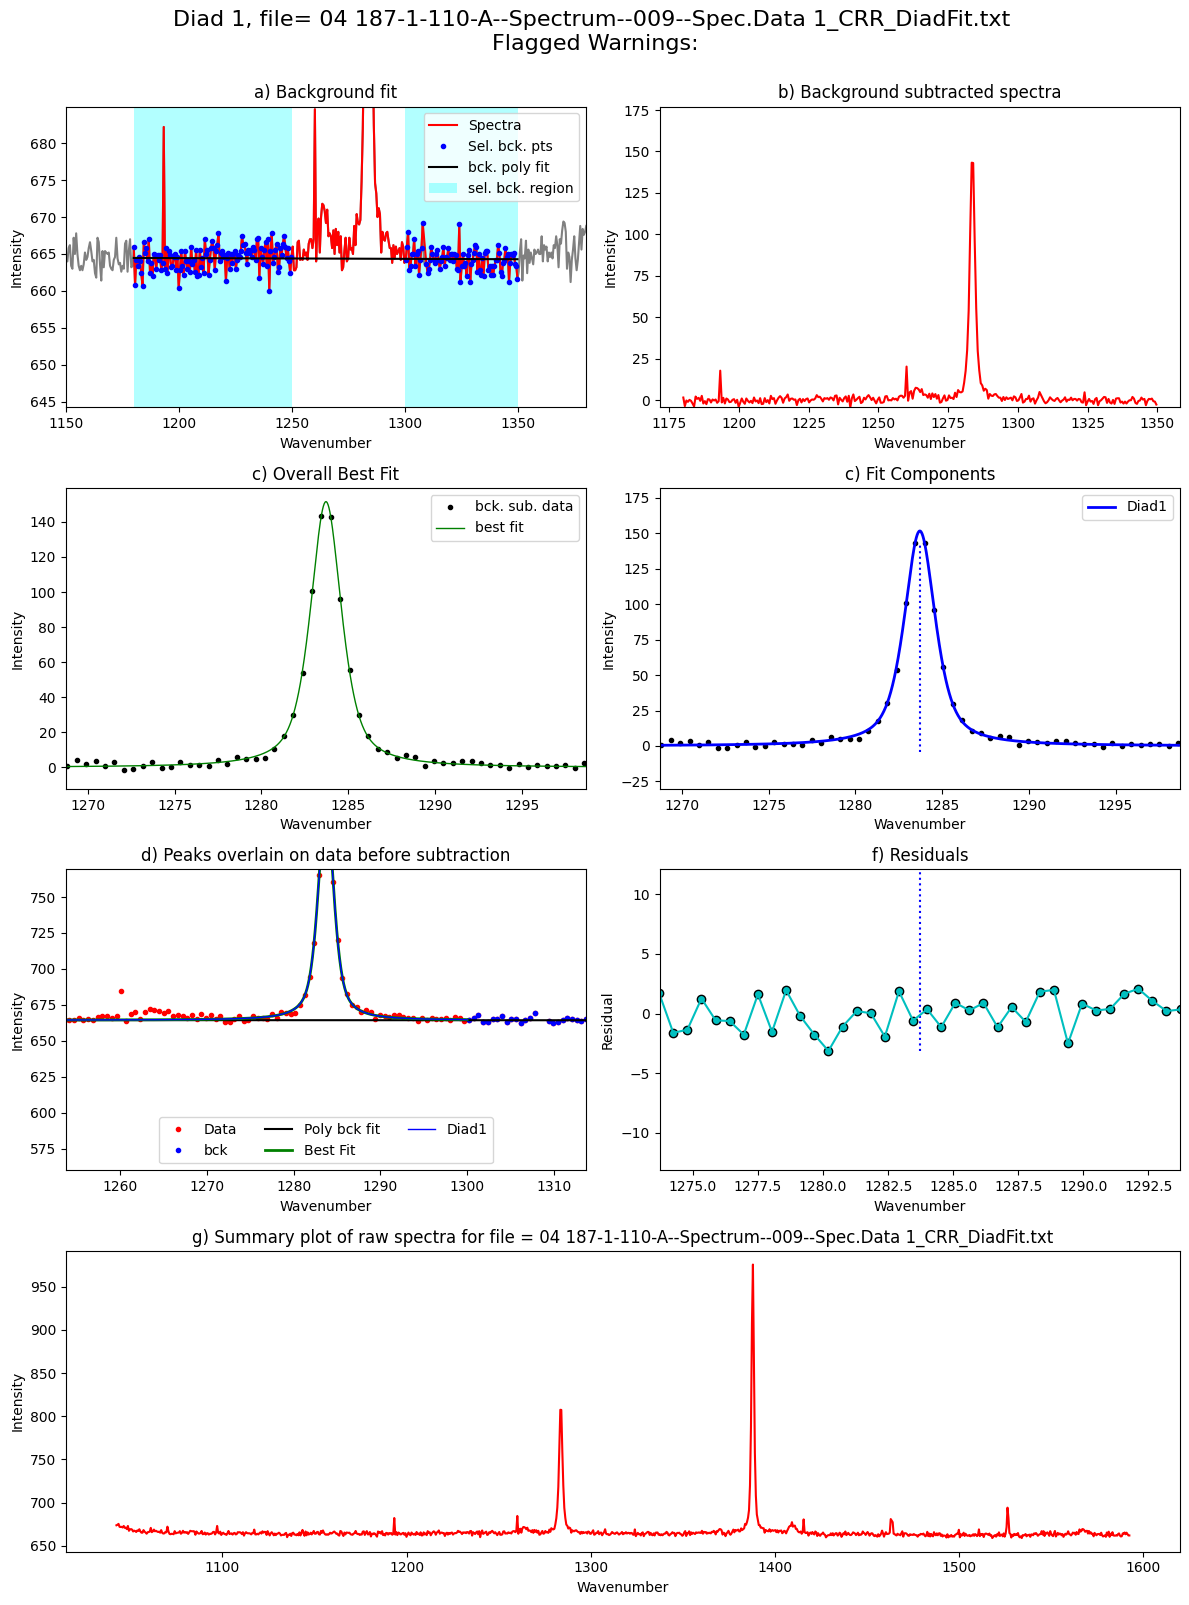

In [ ]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=spectra_filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [ ]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [ ]:
if batch=='Std':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init


if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=False, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.4, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=312.908659122832, HB_prom=nan, C13_prom=10, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False)

### See what these fit parameters look like for diad2

/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1387.953049       1387.953049        0.006245        710.687424   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma  Diad2_Combofit_Height  \
0           0.812486                  0             314.325369   

   Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm        Diad2_refit  \
0        2.222357        0.728951    1.624972  Flagged Warnings:   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.087983      1.085627                    0.14297   

   Diad2_Remigi2021_BSF   Diad2_PDF_Model  
0               0.00517  PseudoVoigtModel

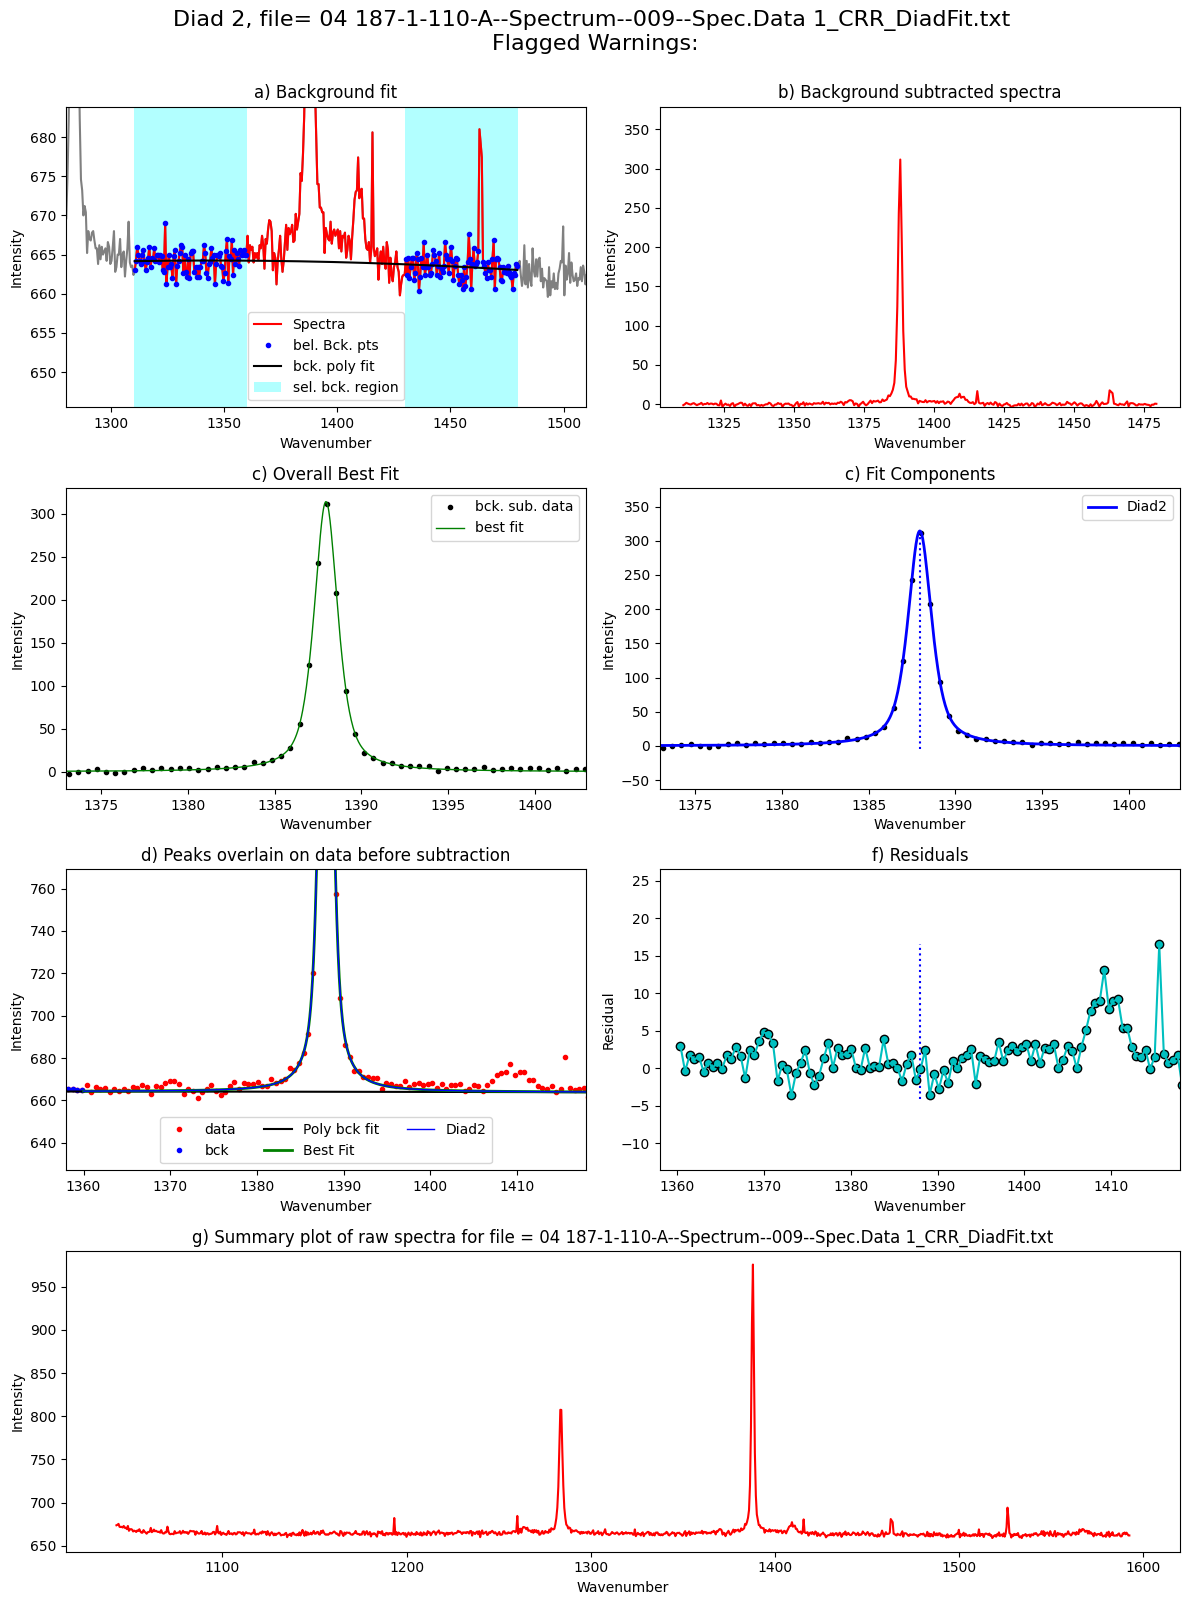

In [ ]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=spectra_filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/8 [00:00<?, ?it/s]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 04 187-1-110-A--Spectrum--009--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 12%|█▎        | 1/8 [00:01<00:11,  1.71s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 05 187-1-110-A--Spectrum--010--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 25%|██▌       | 2/8 [00:02<00:08,  1.46s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 06 187-1-110-A--Spectrum--011--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 38%|███▊      | 3/8 [00:04<00:06,  1.37s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 26 187-1-111-reg1-C--Spectrum--043--Spec.Data 1_CRR_DiadFit.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 50%|█████     | 4/8 [00:05<00:05,  1.33s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 27 187-1-111-reg1-C--Spectrum--044--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 62%|██████▎   | 5/8 [00:06<00:03,  1.29s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 33 187-1-111-reg2-B--Spectrum--052--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 75%|███████▌  | 6/8 [00:08<00:02,  1.30s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 34 187-1-111-reg2-B--Spectrum--053--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
 88%|████████▊ | 7/8 [00:09<00:01,  1.29s/it]/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)


Processing file: 35 187-1-111-reg2-B--Spectrum--054--Spec.Data 1.txt


/Users/cljd/Documents/Python_dev/DiadFit/src/DiadFit/diads.py:2552: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_out=df_out.fillna(0)
100%|██████████| 8/8 [00:10<00:00,  1.33s/it]


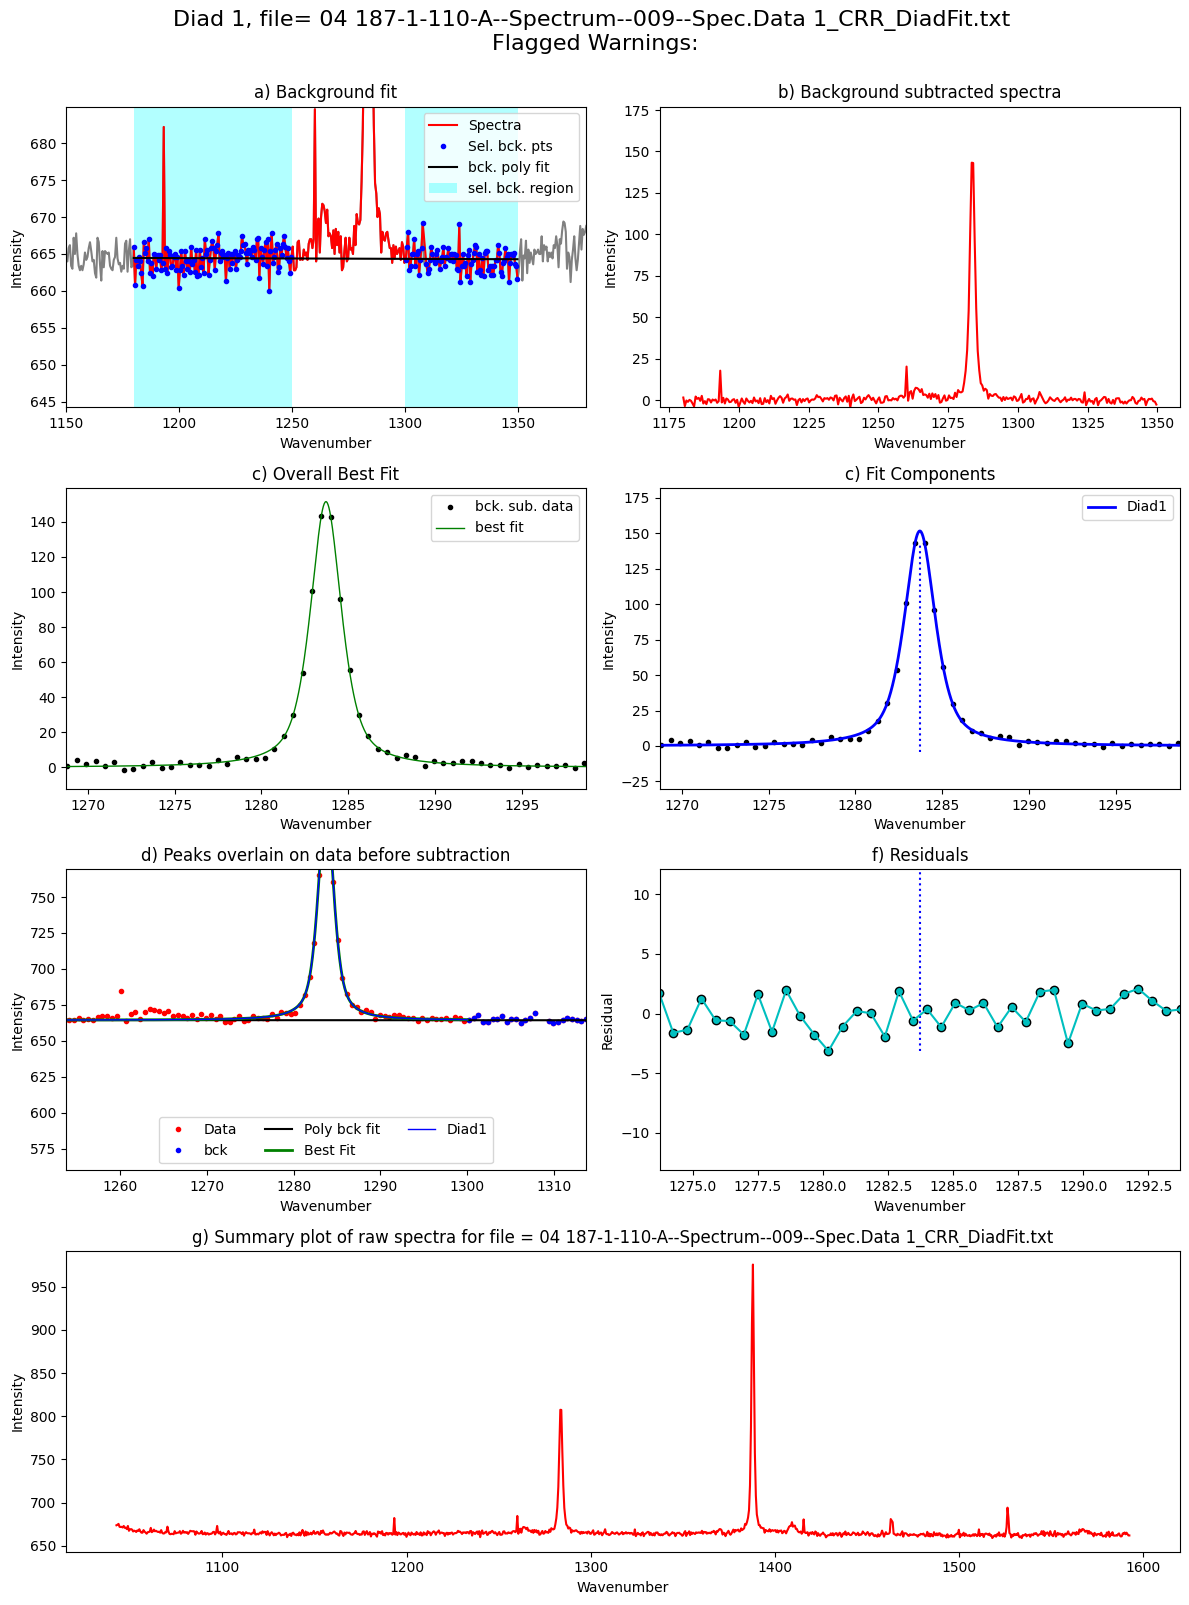

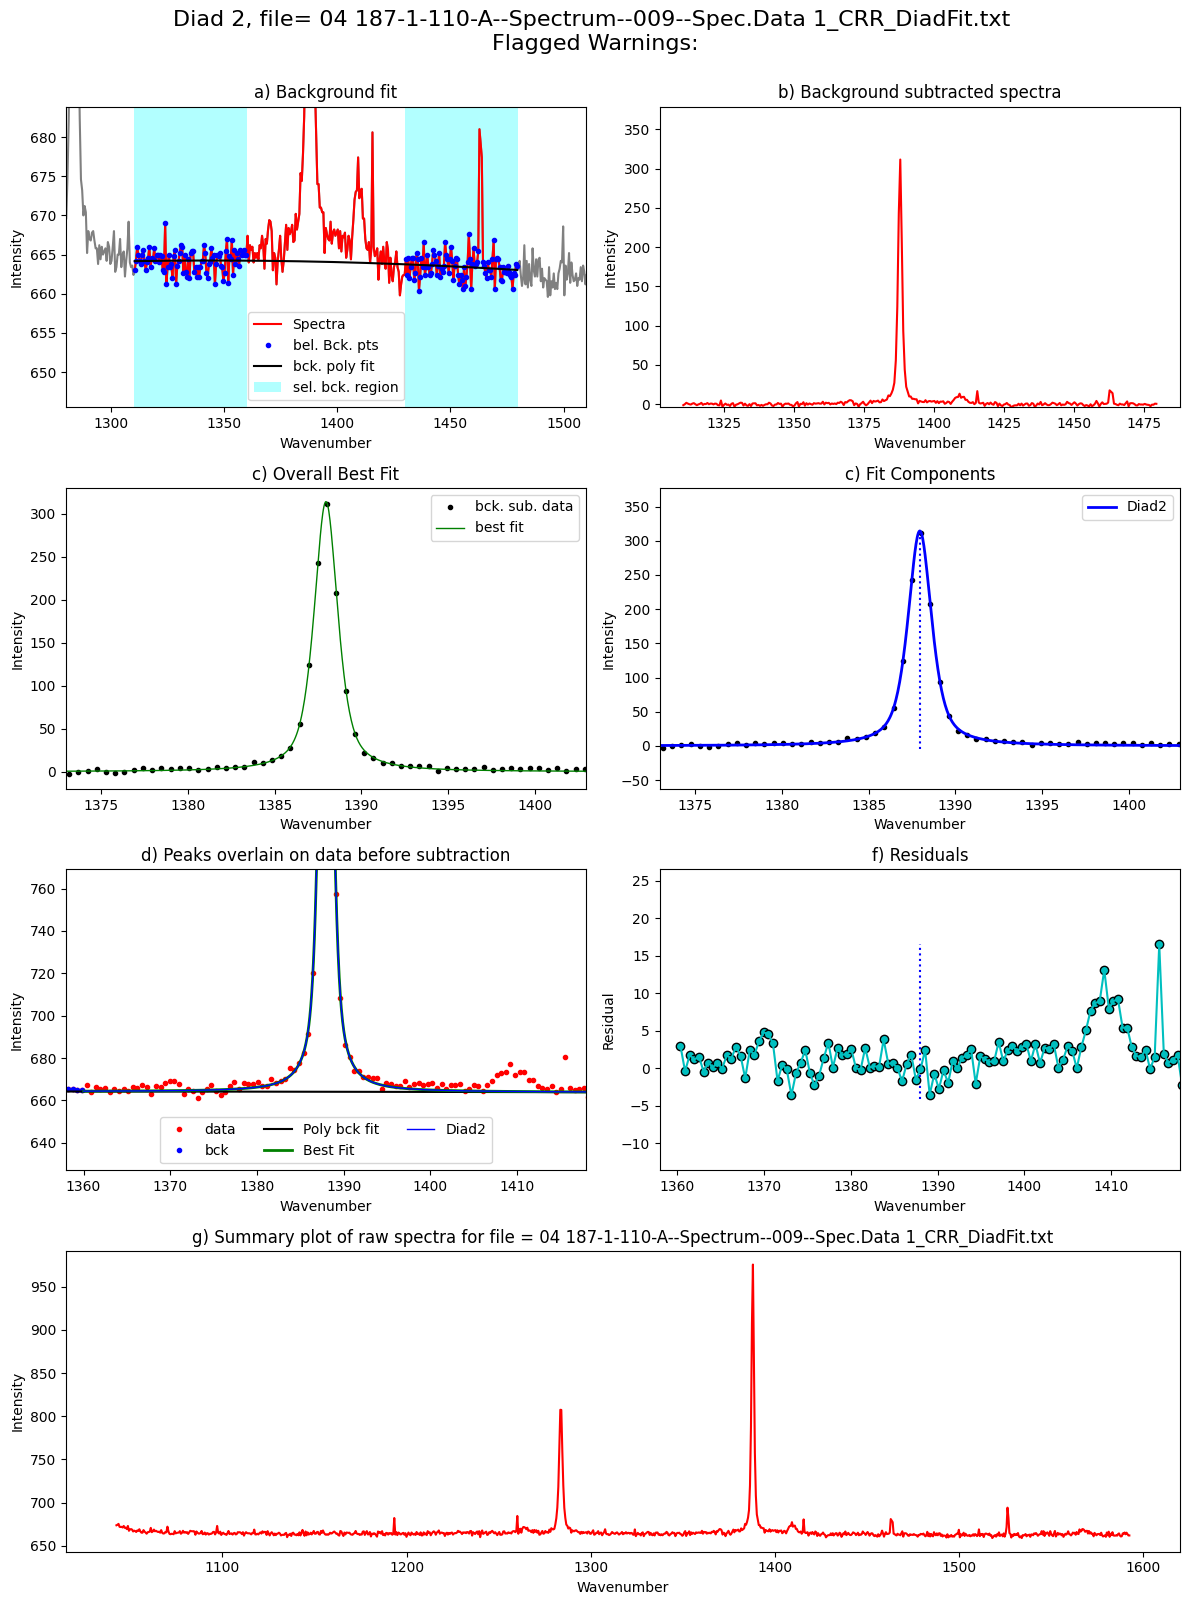

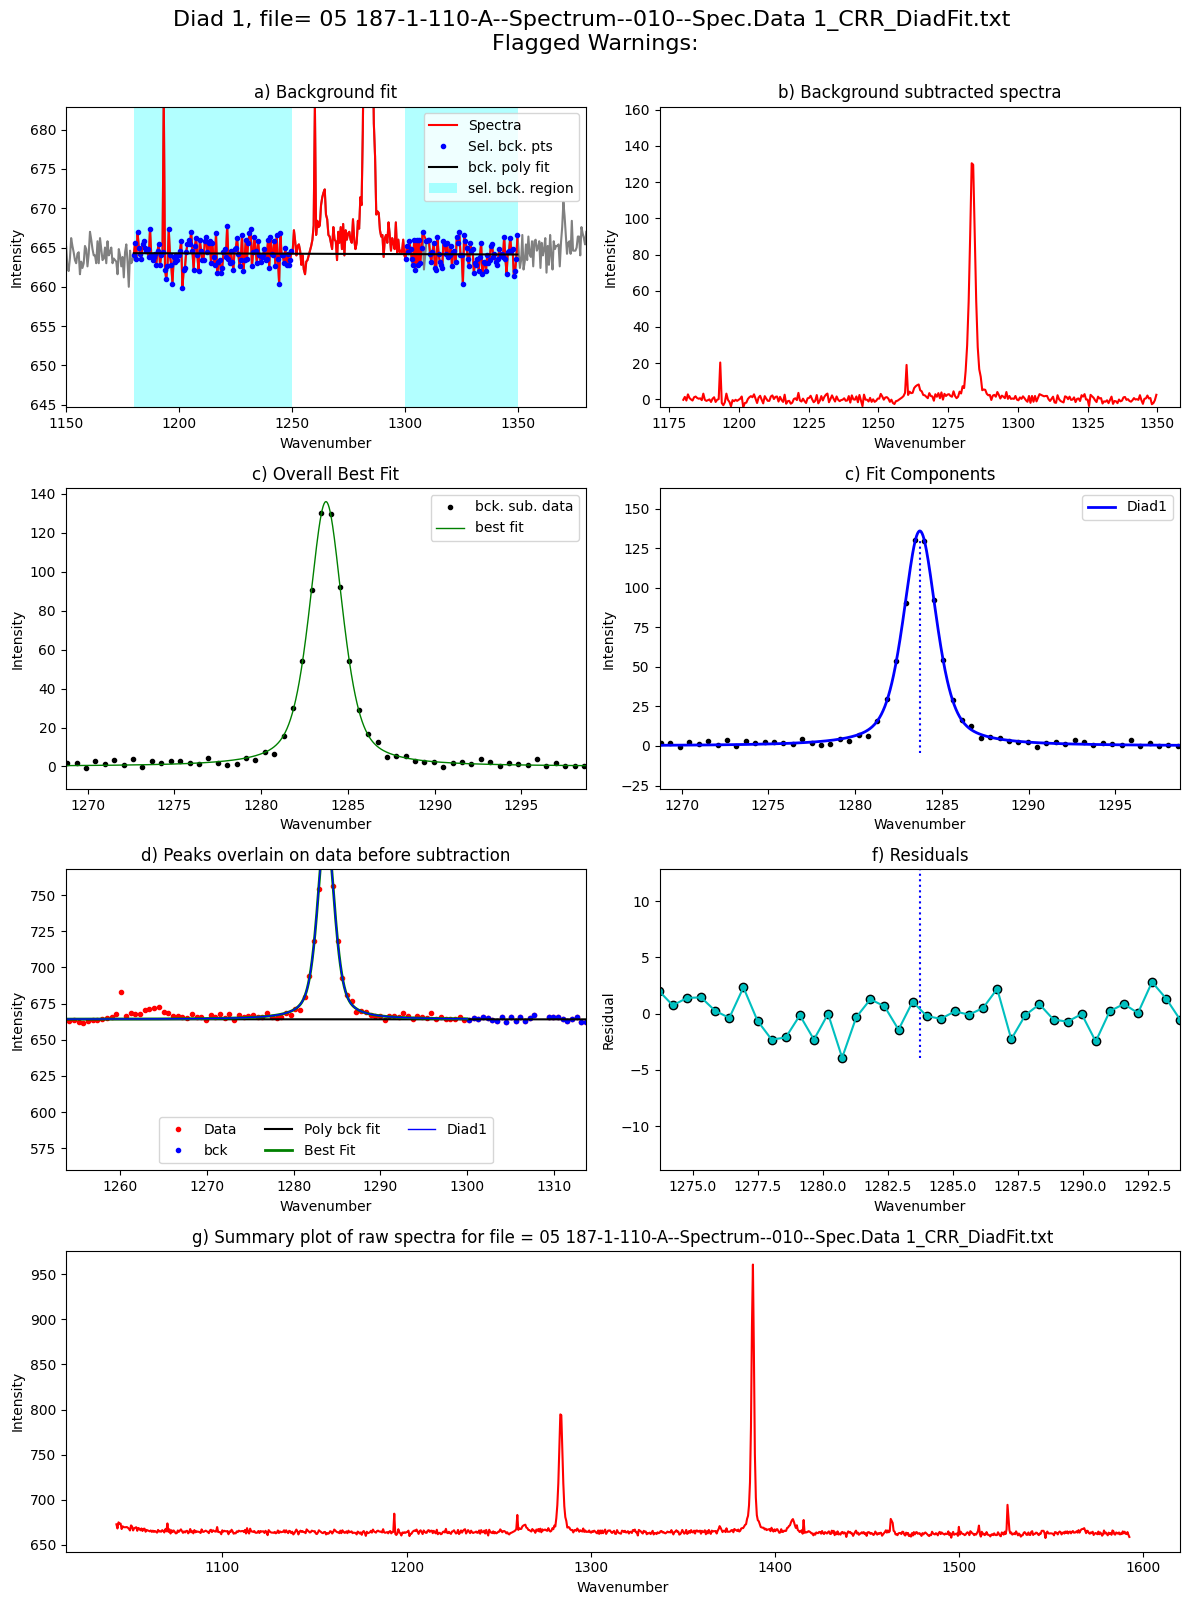

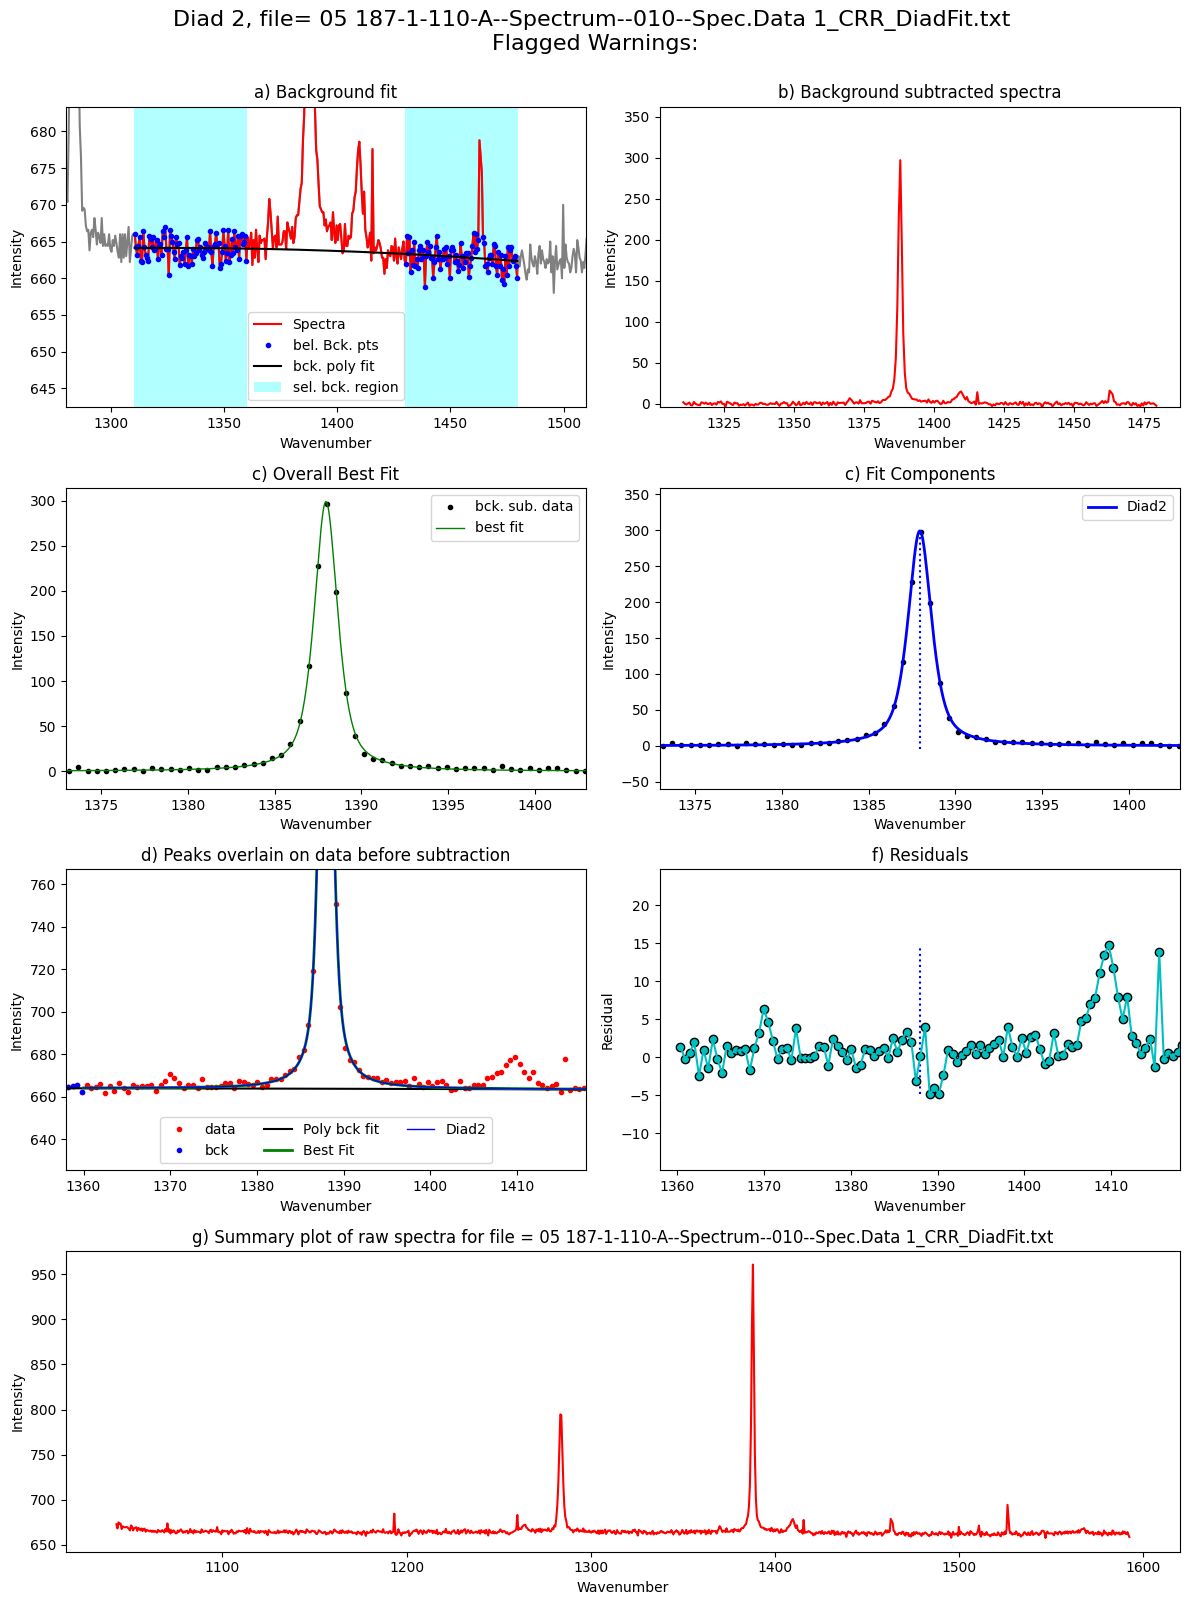

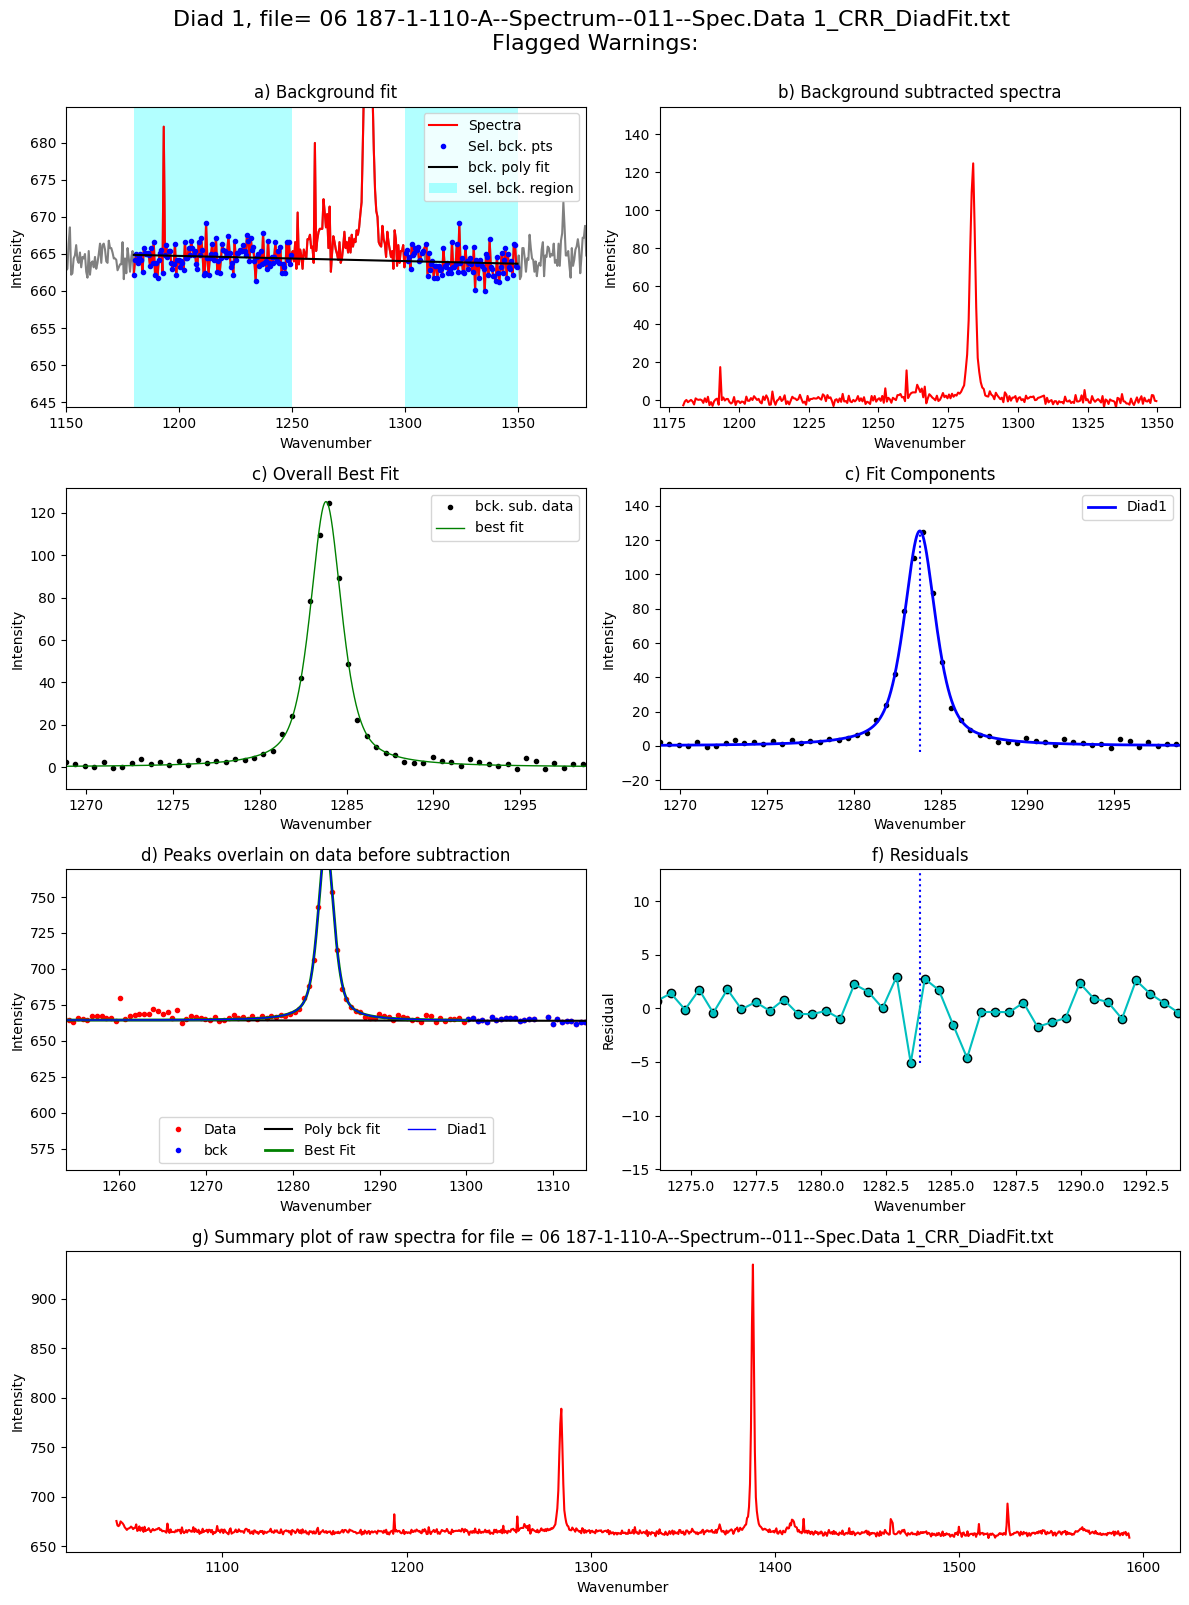

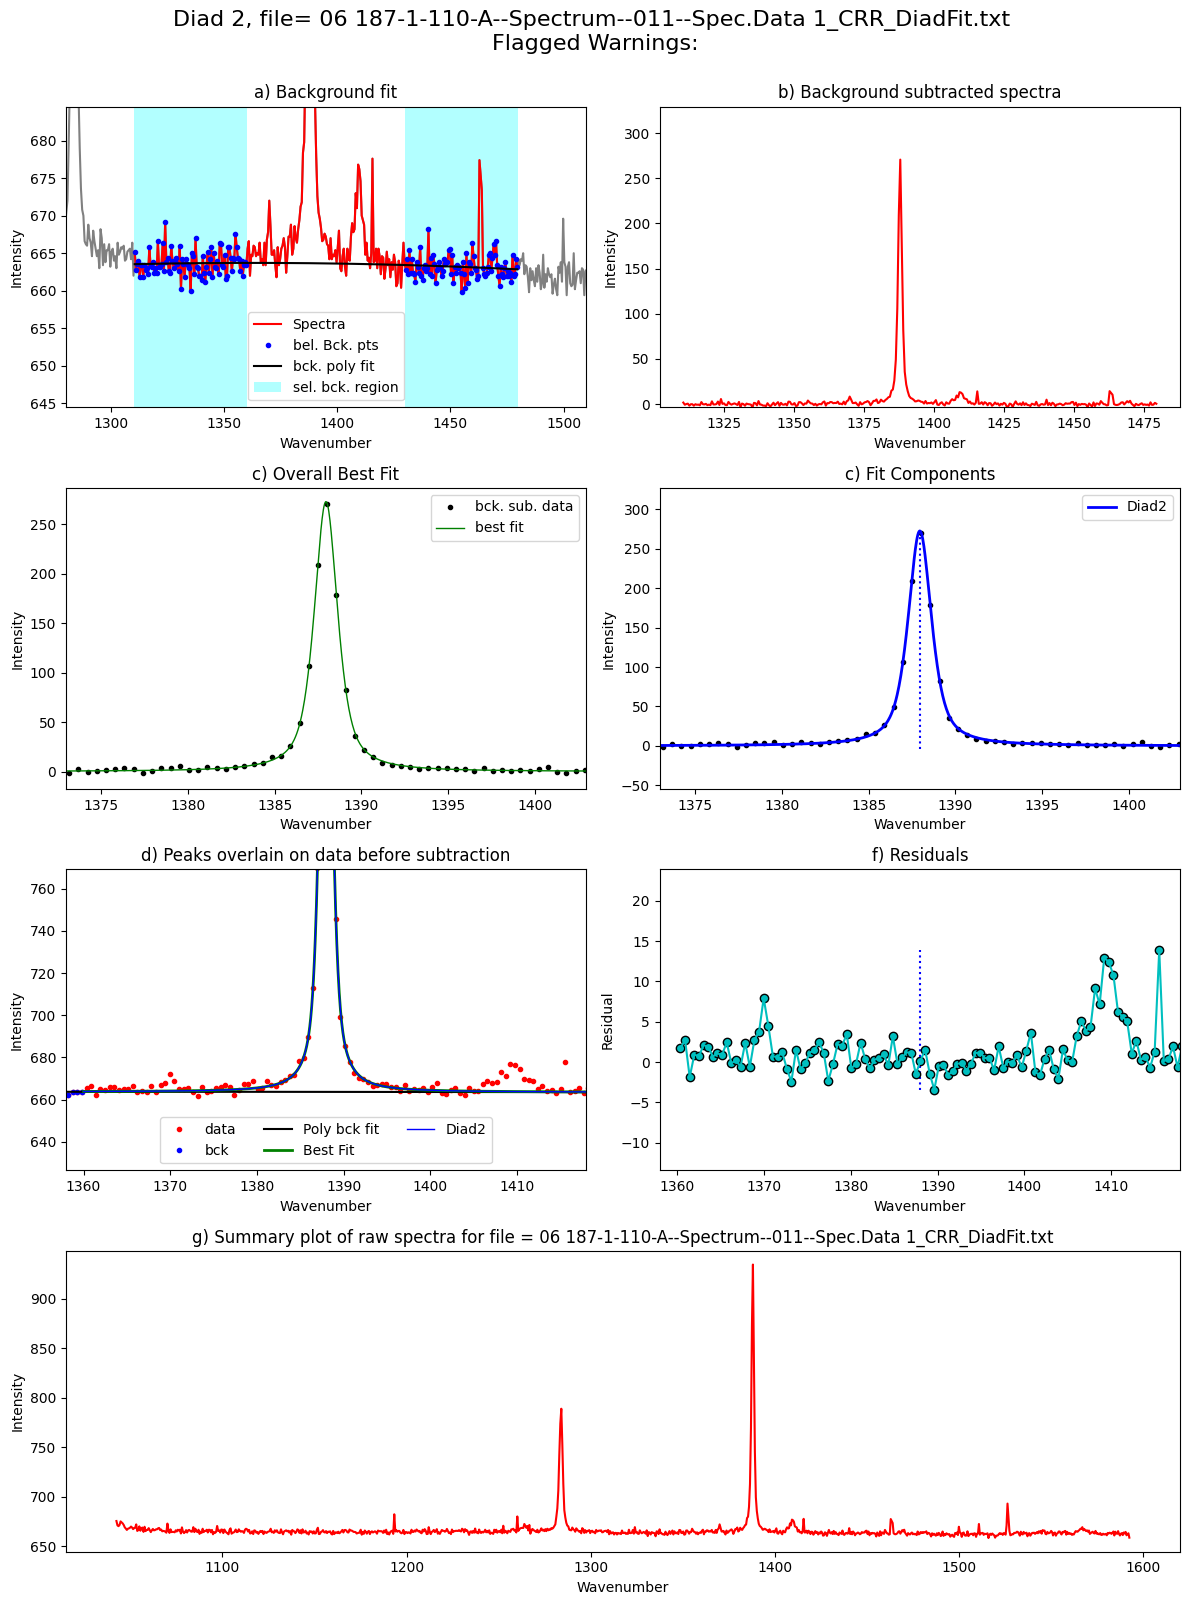

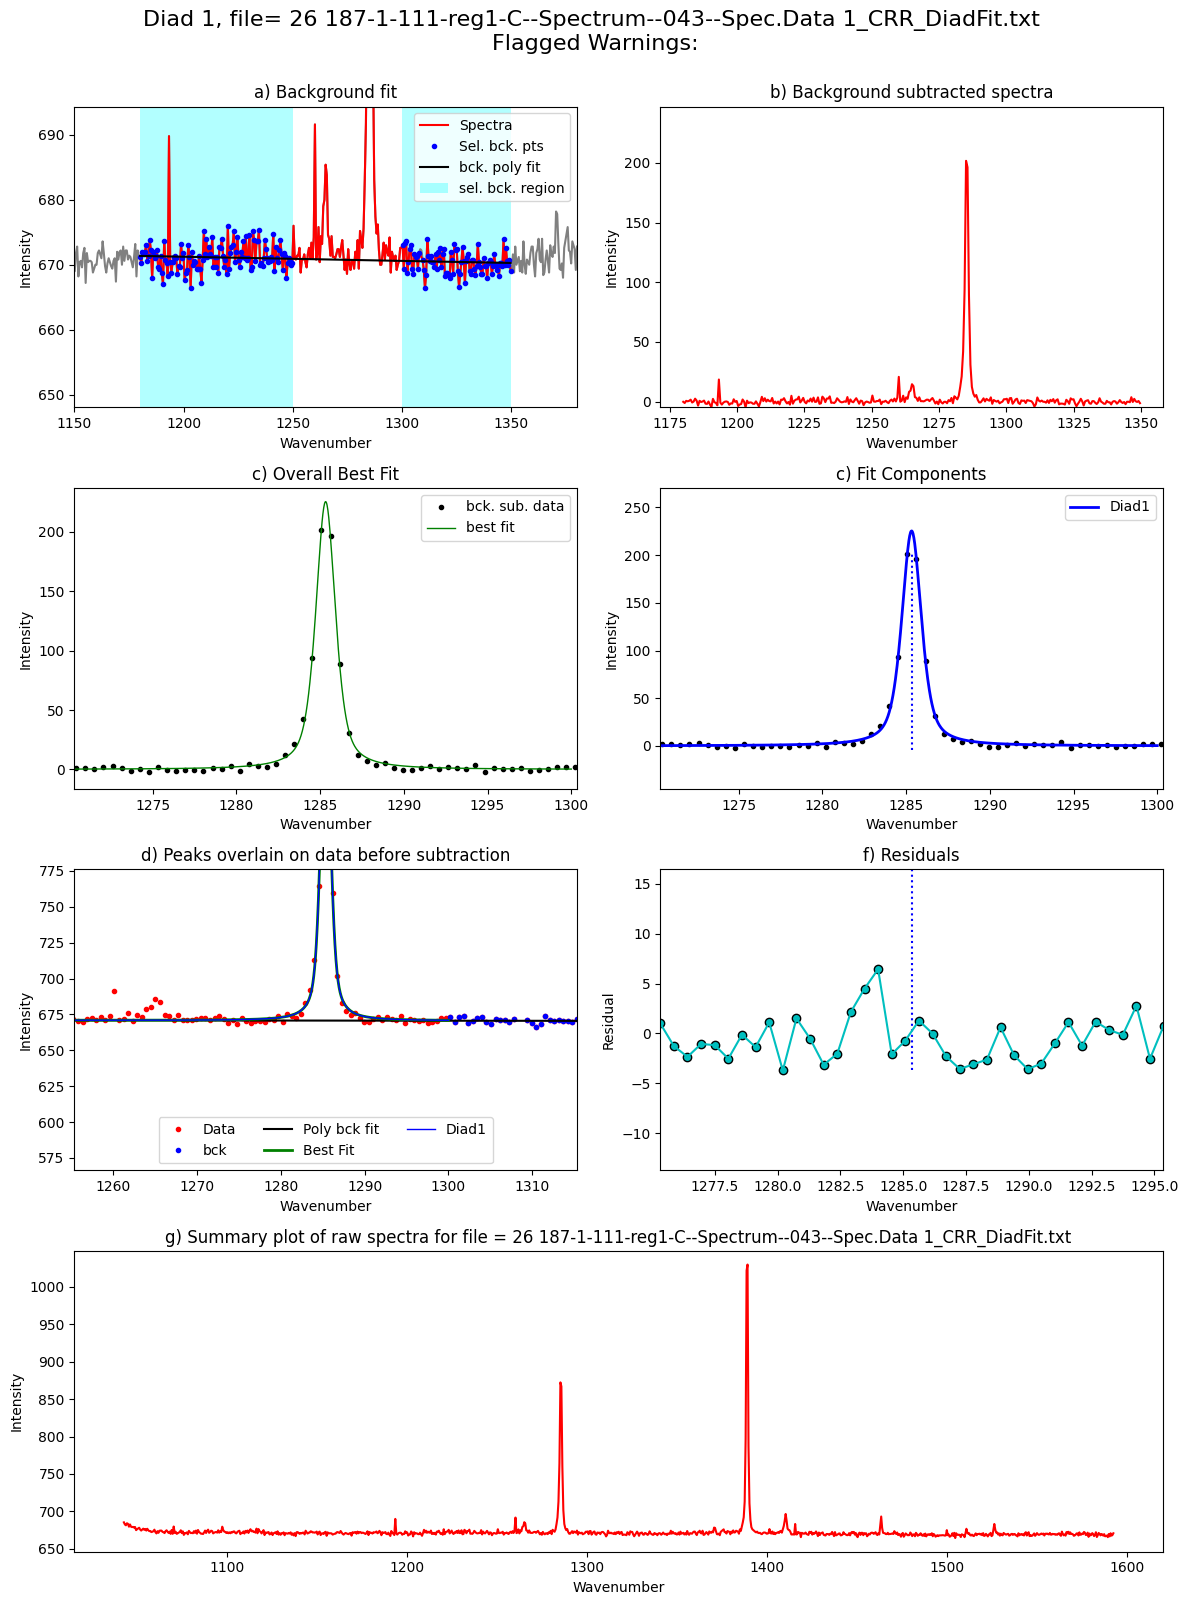

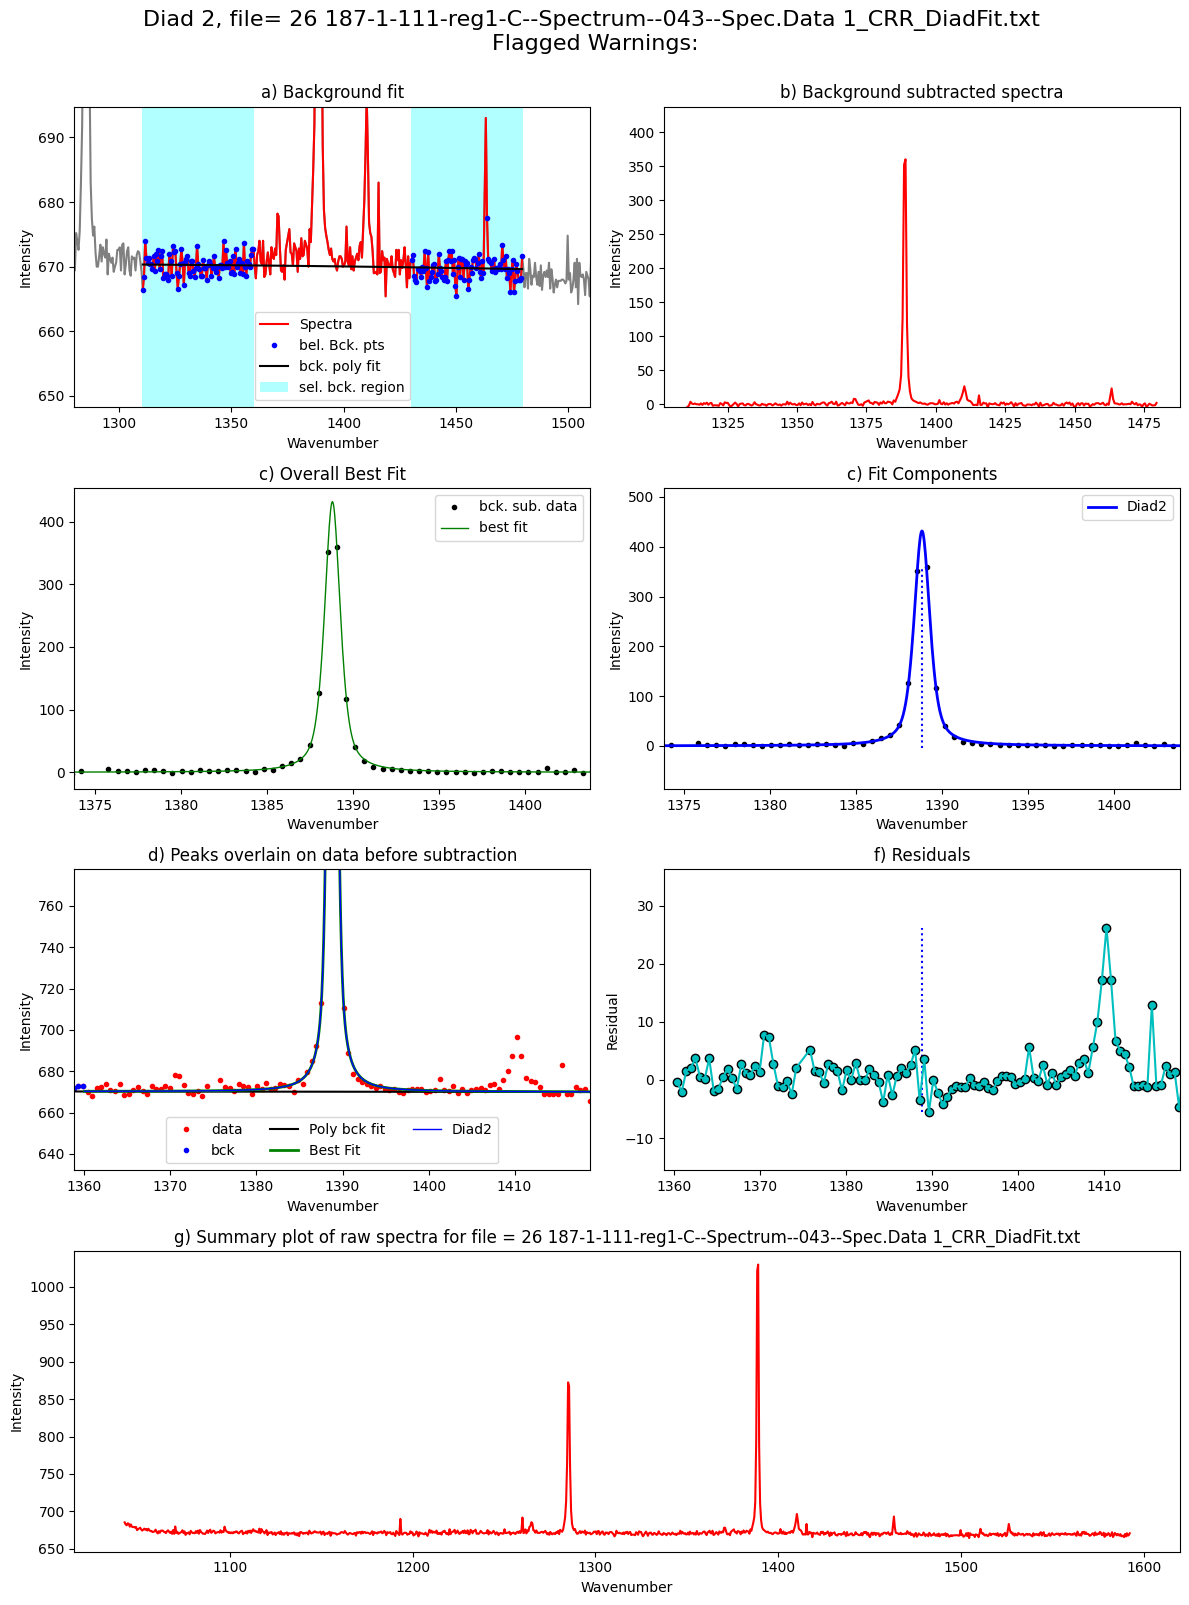

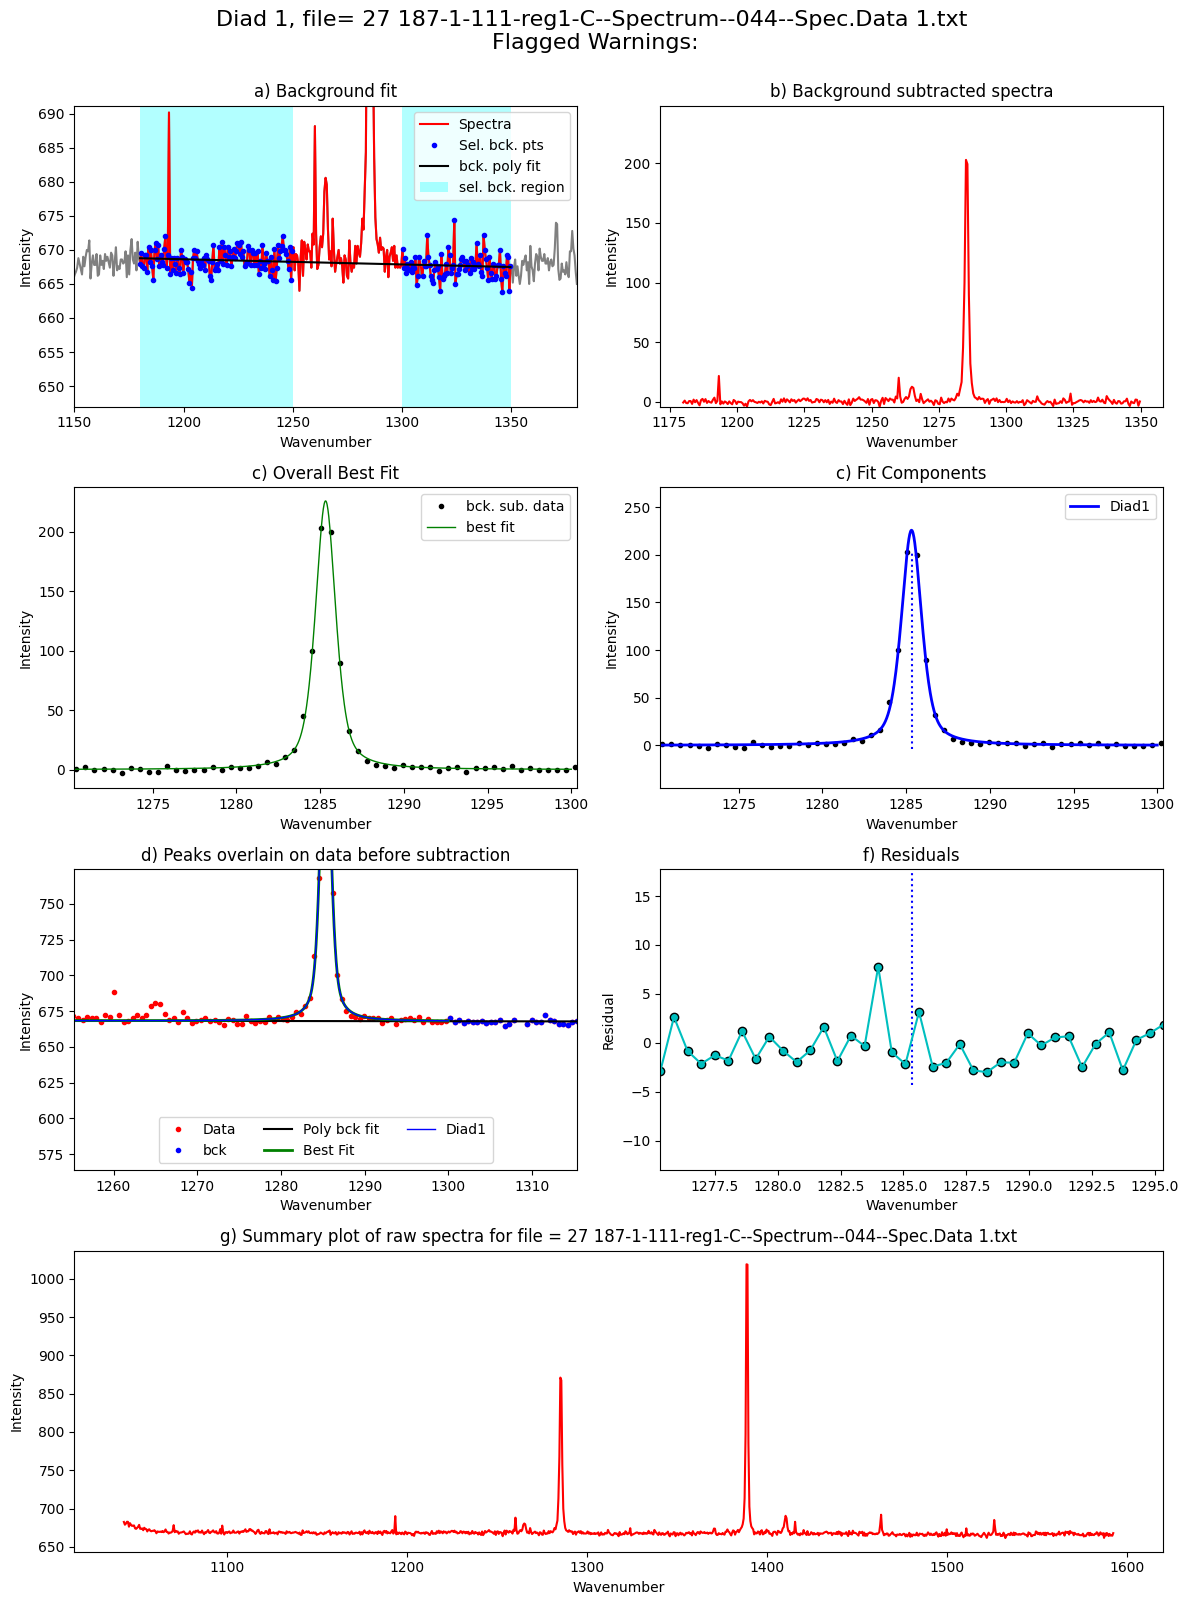

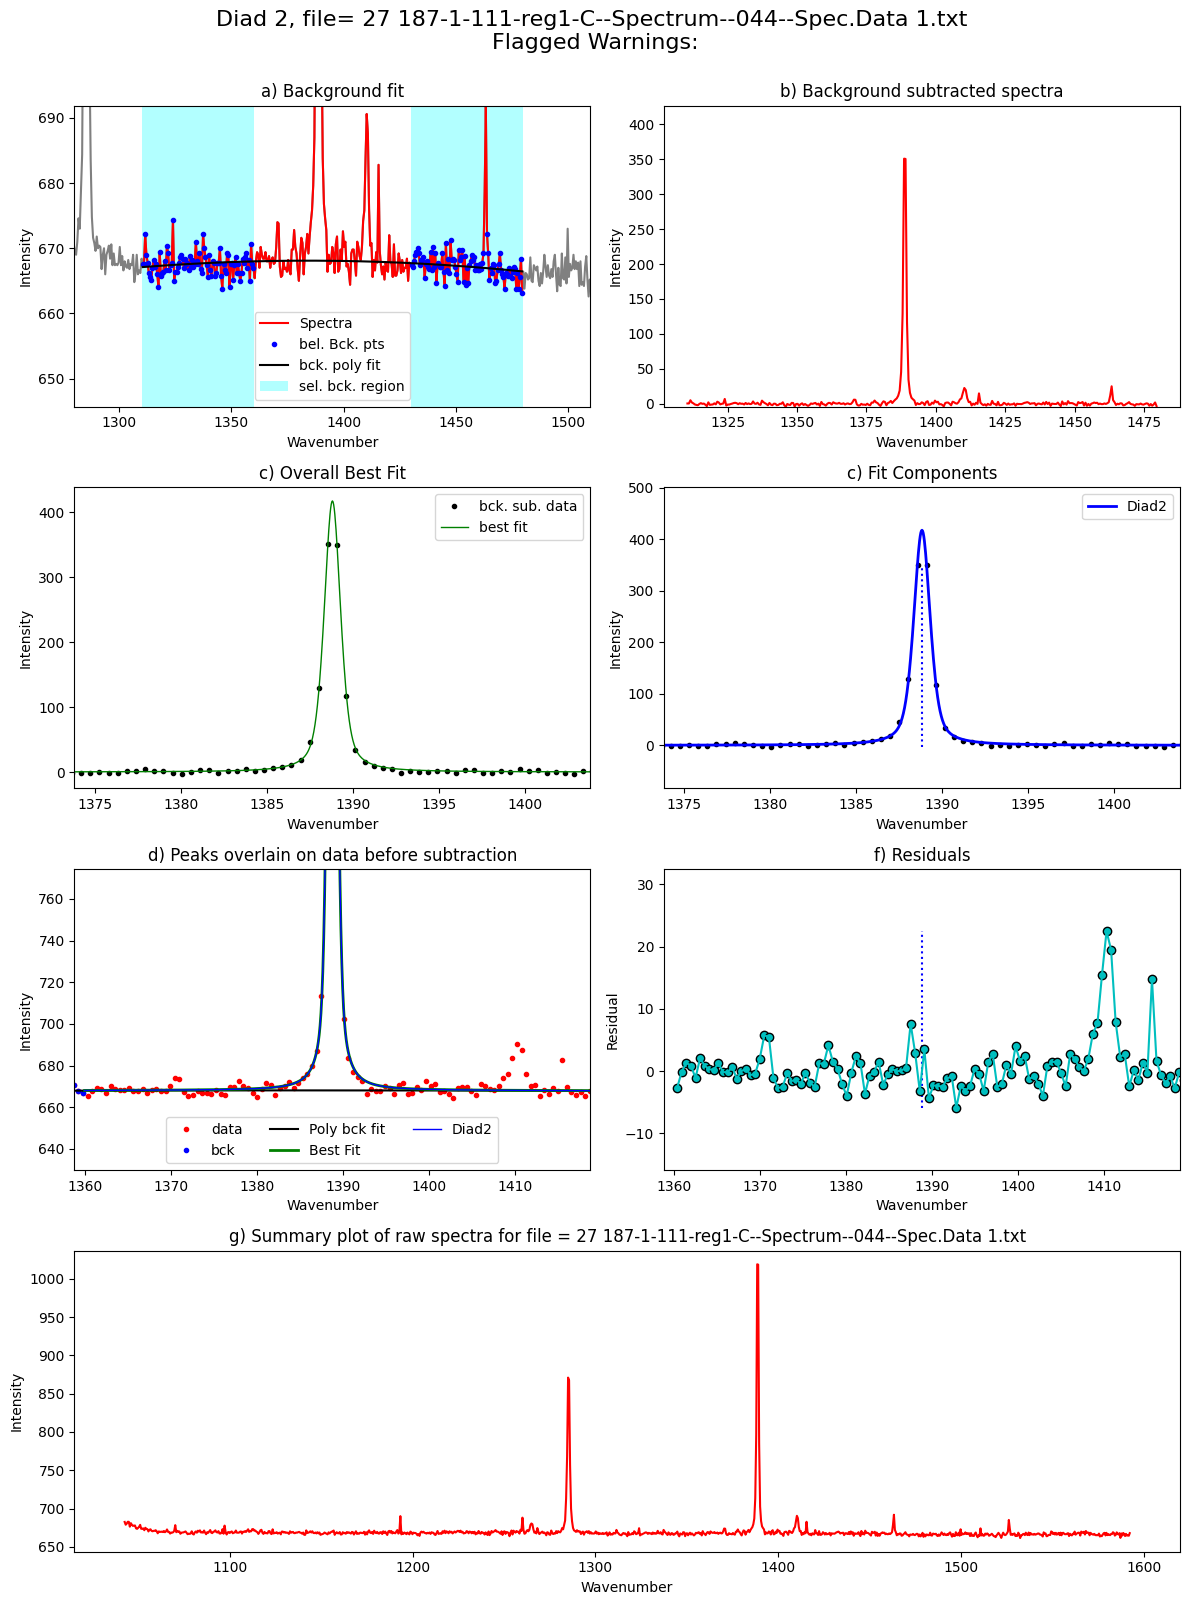

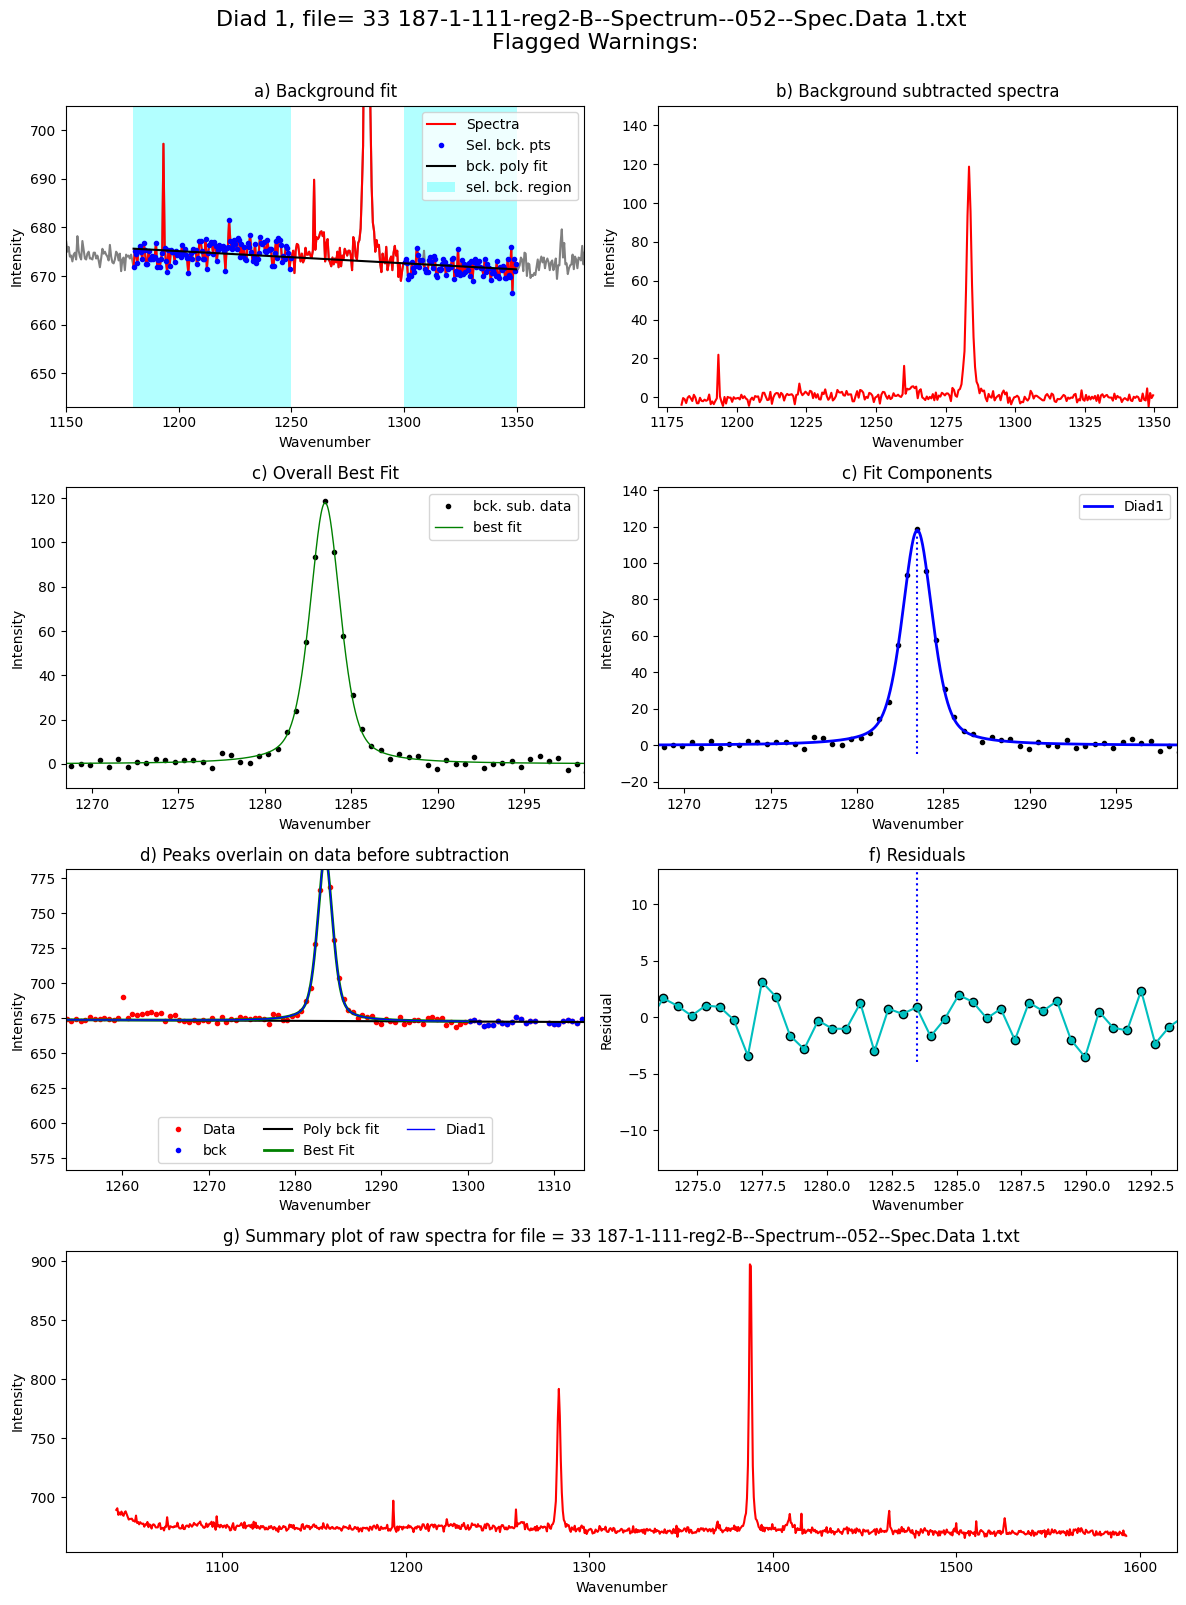

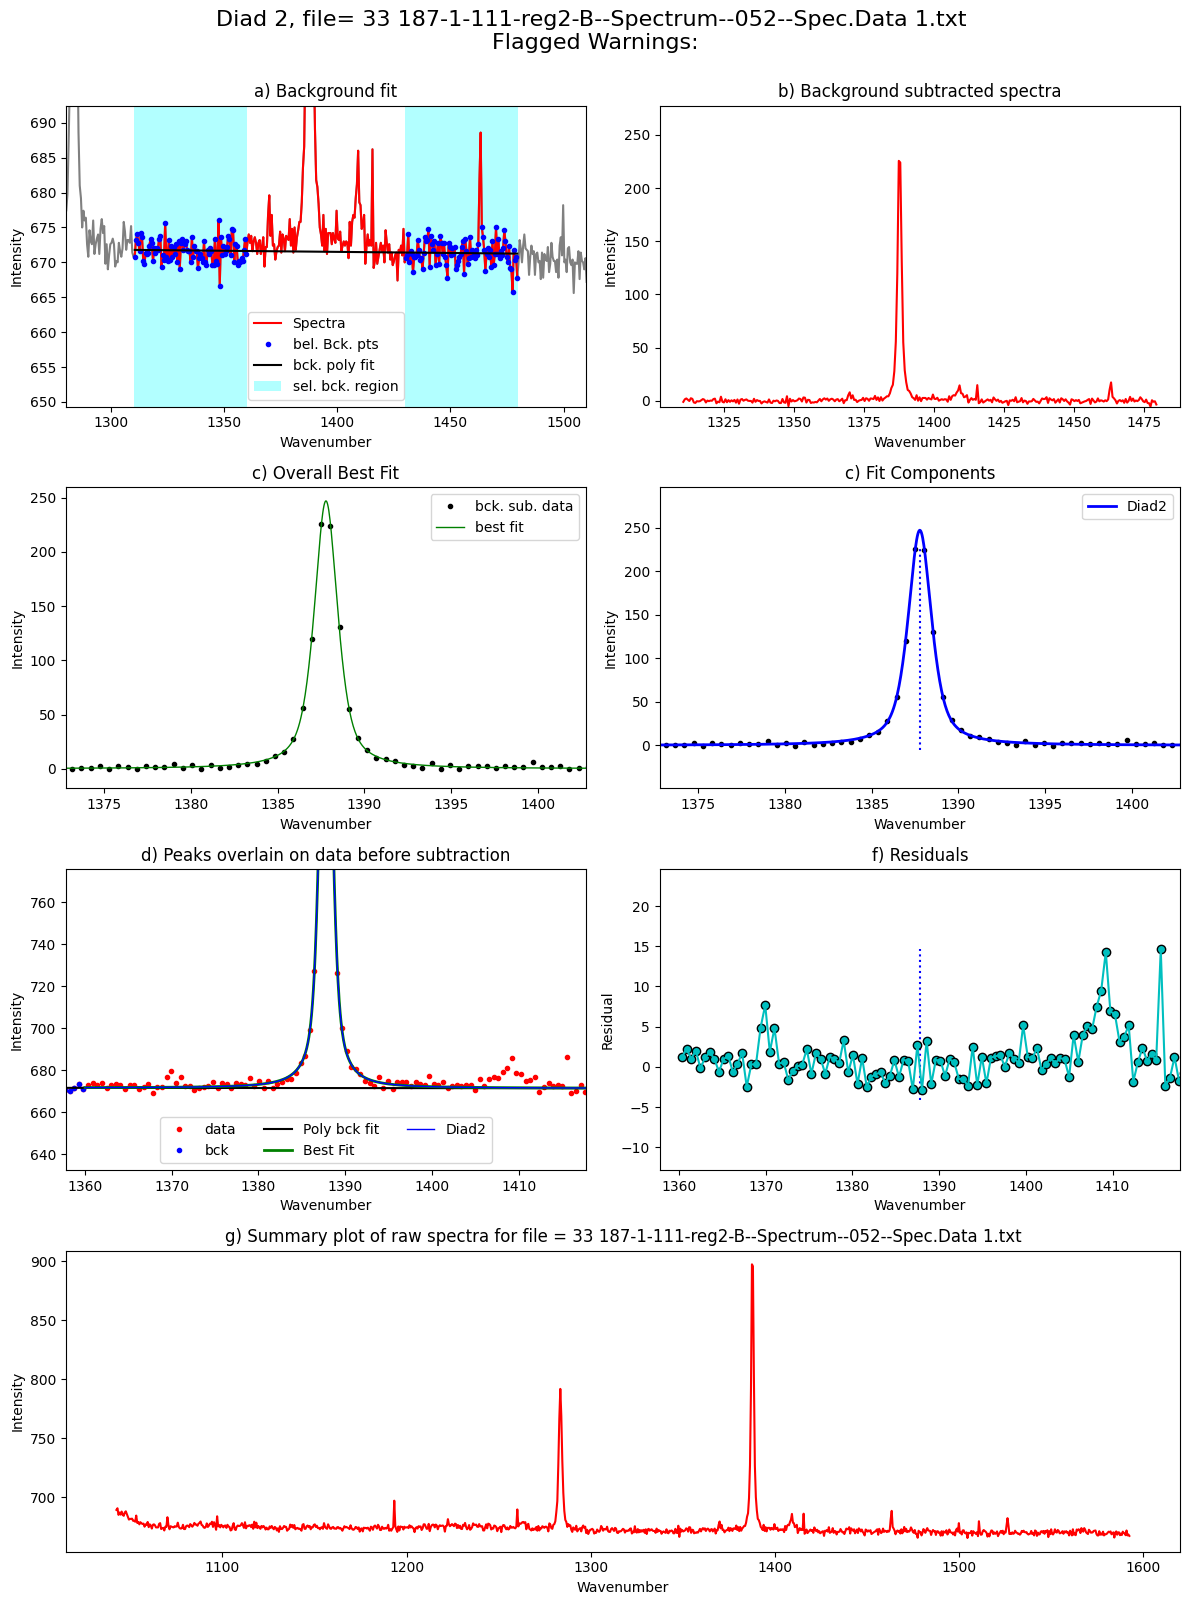

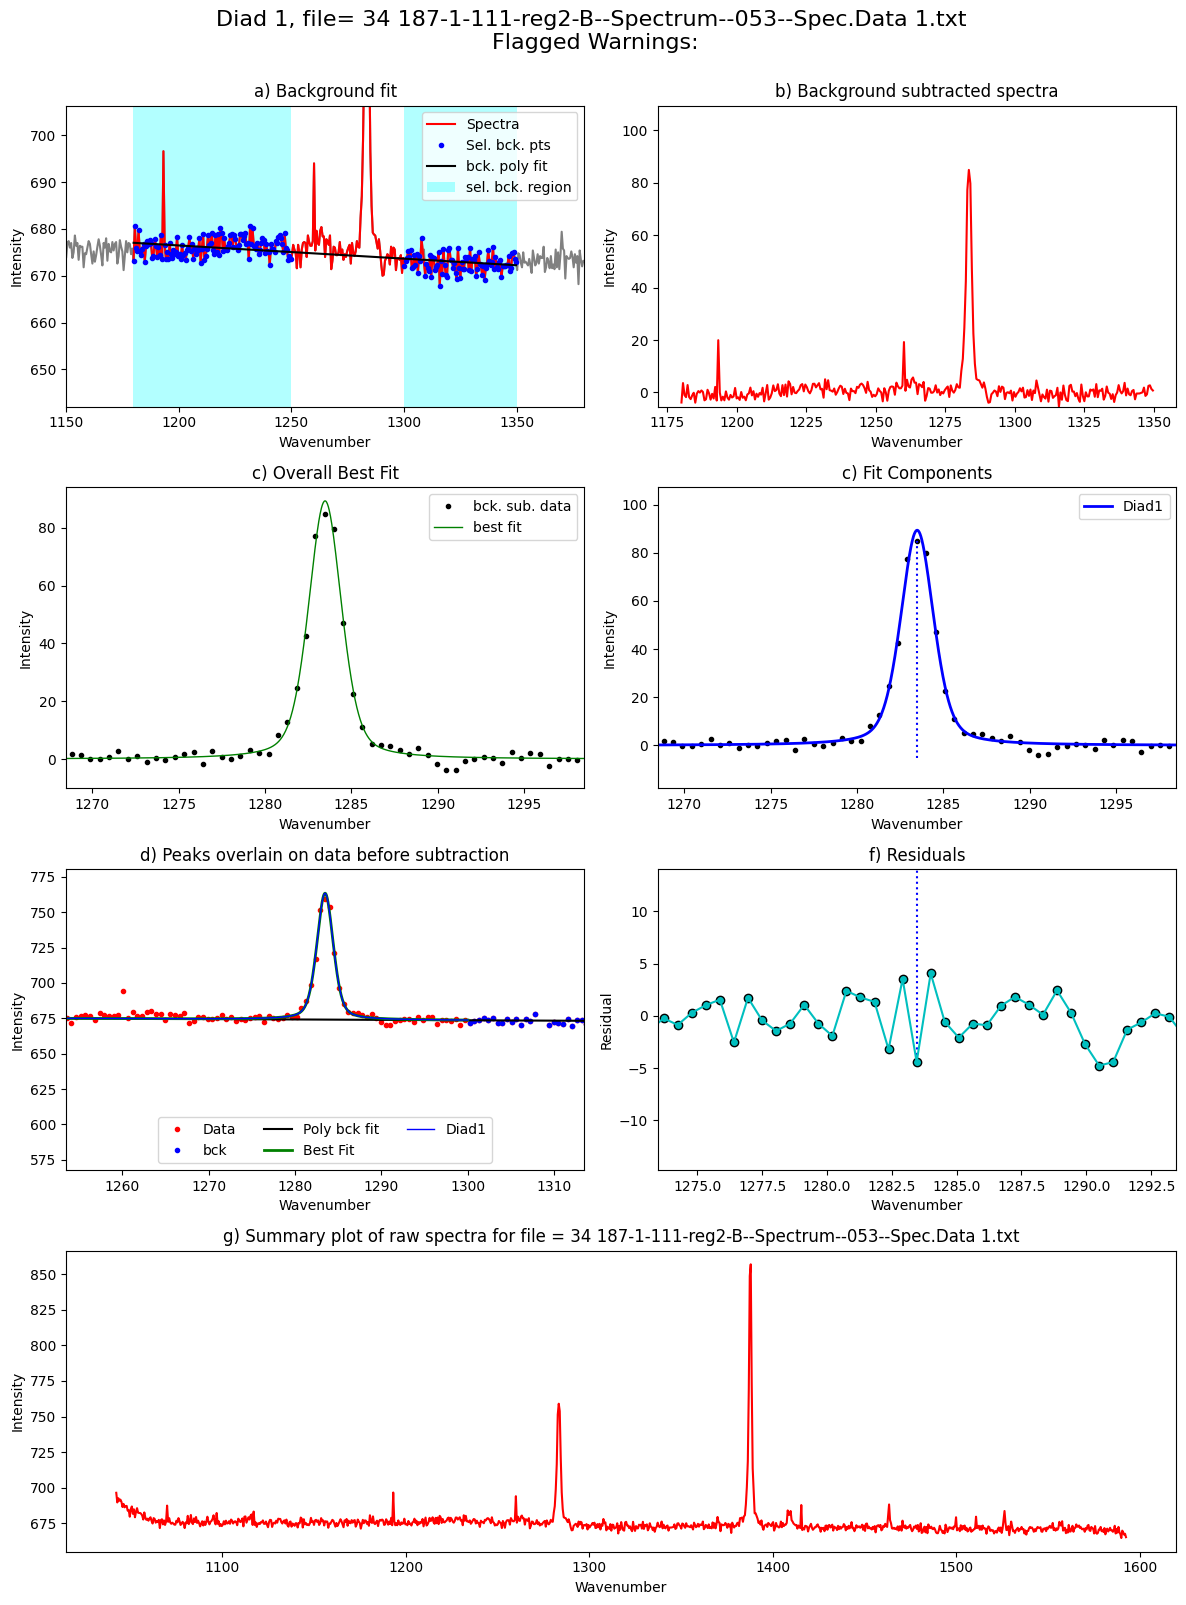

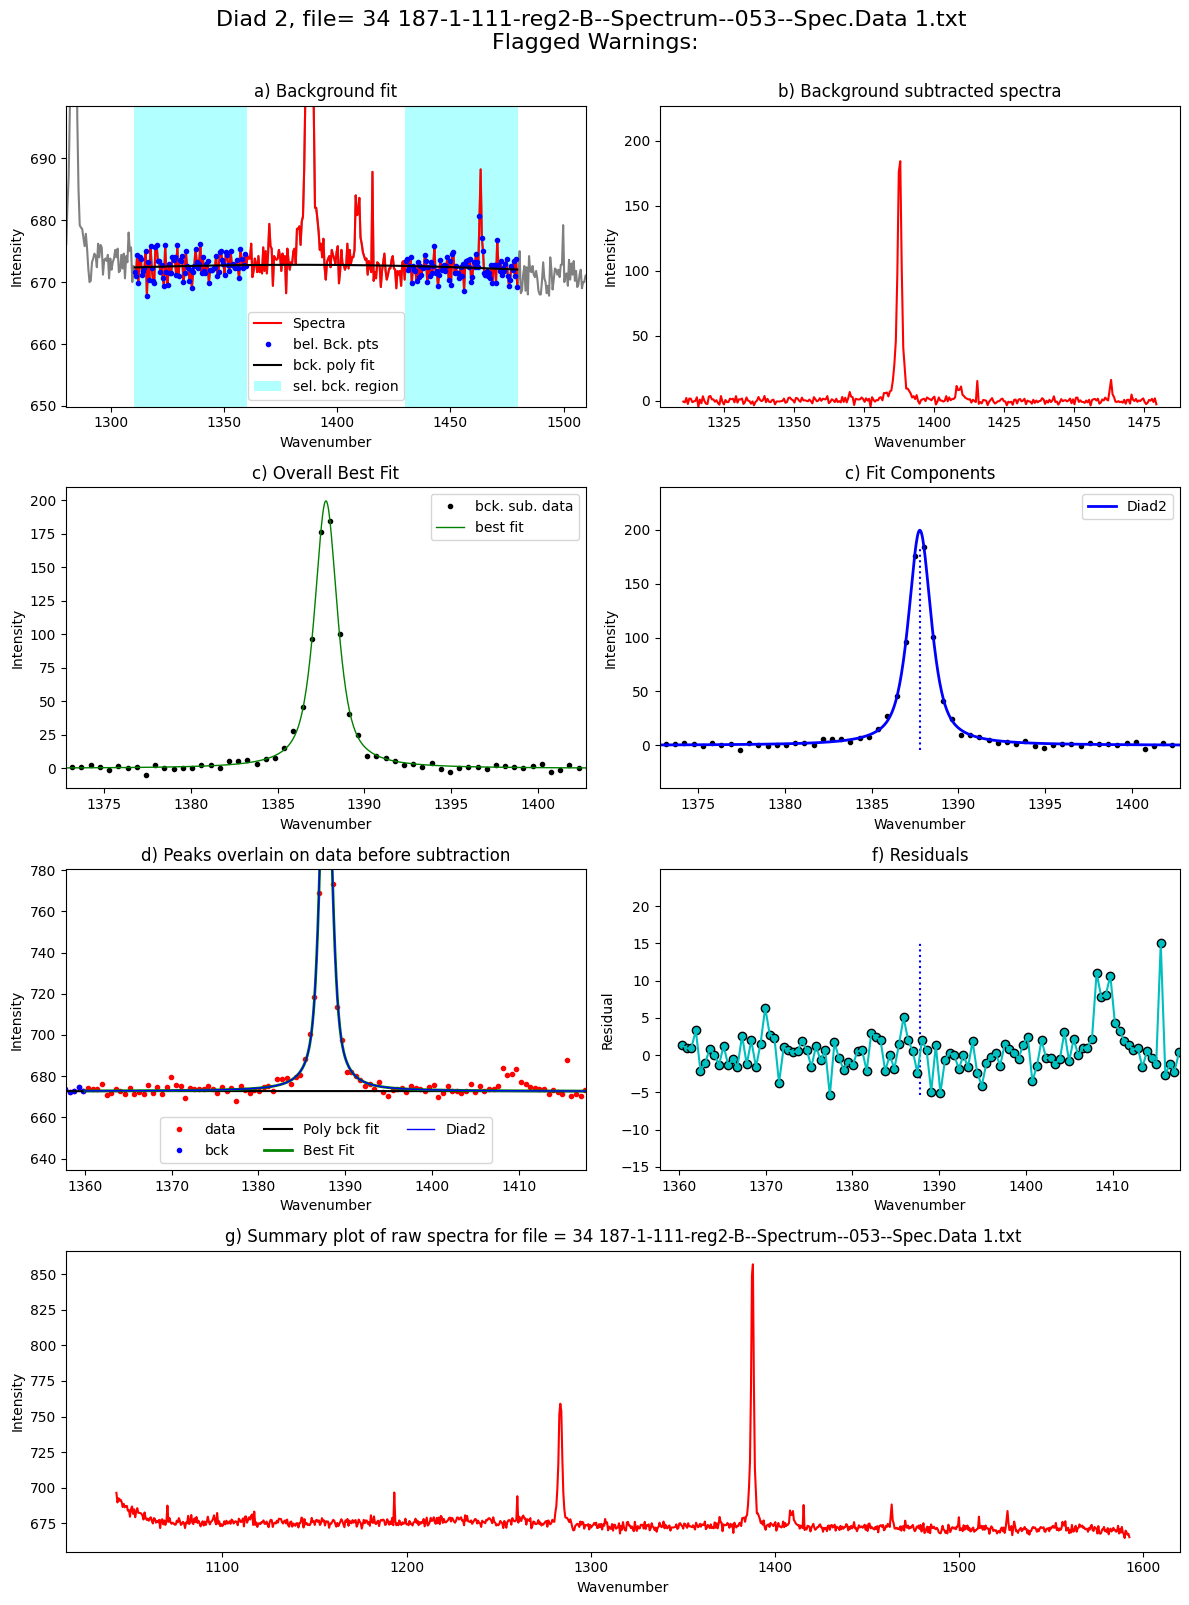

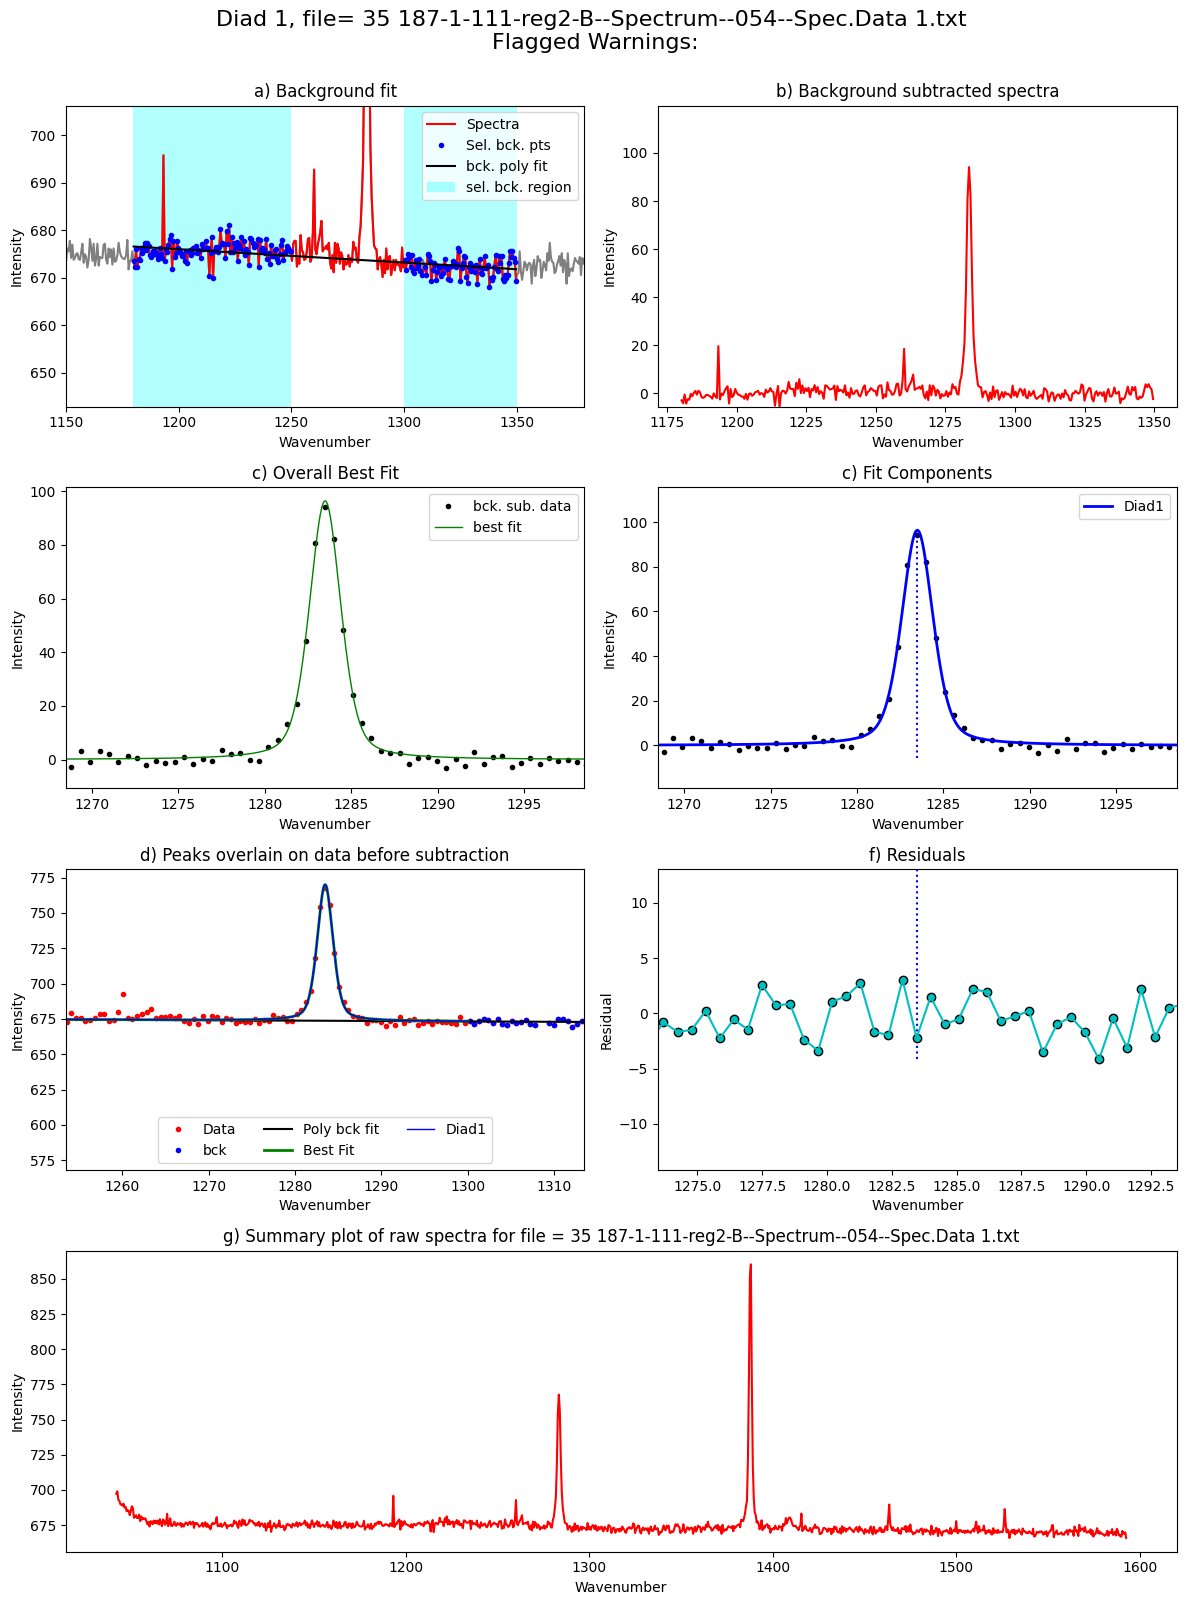

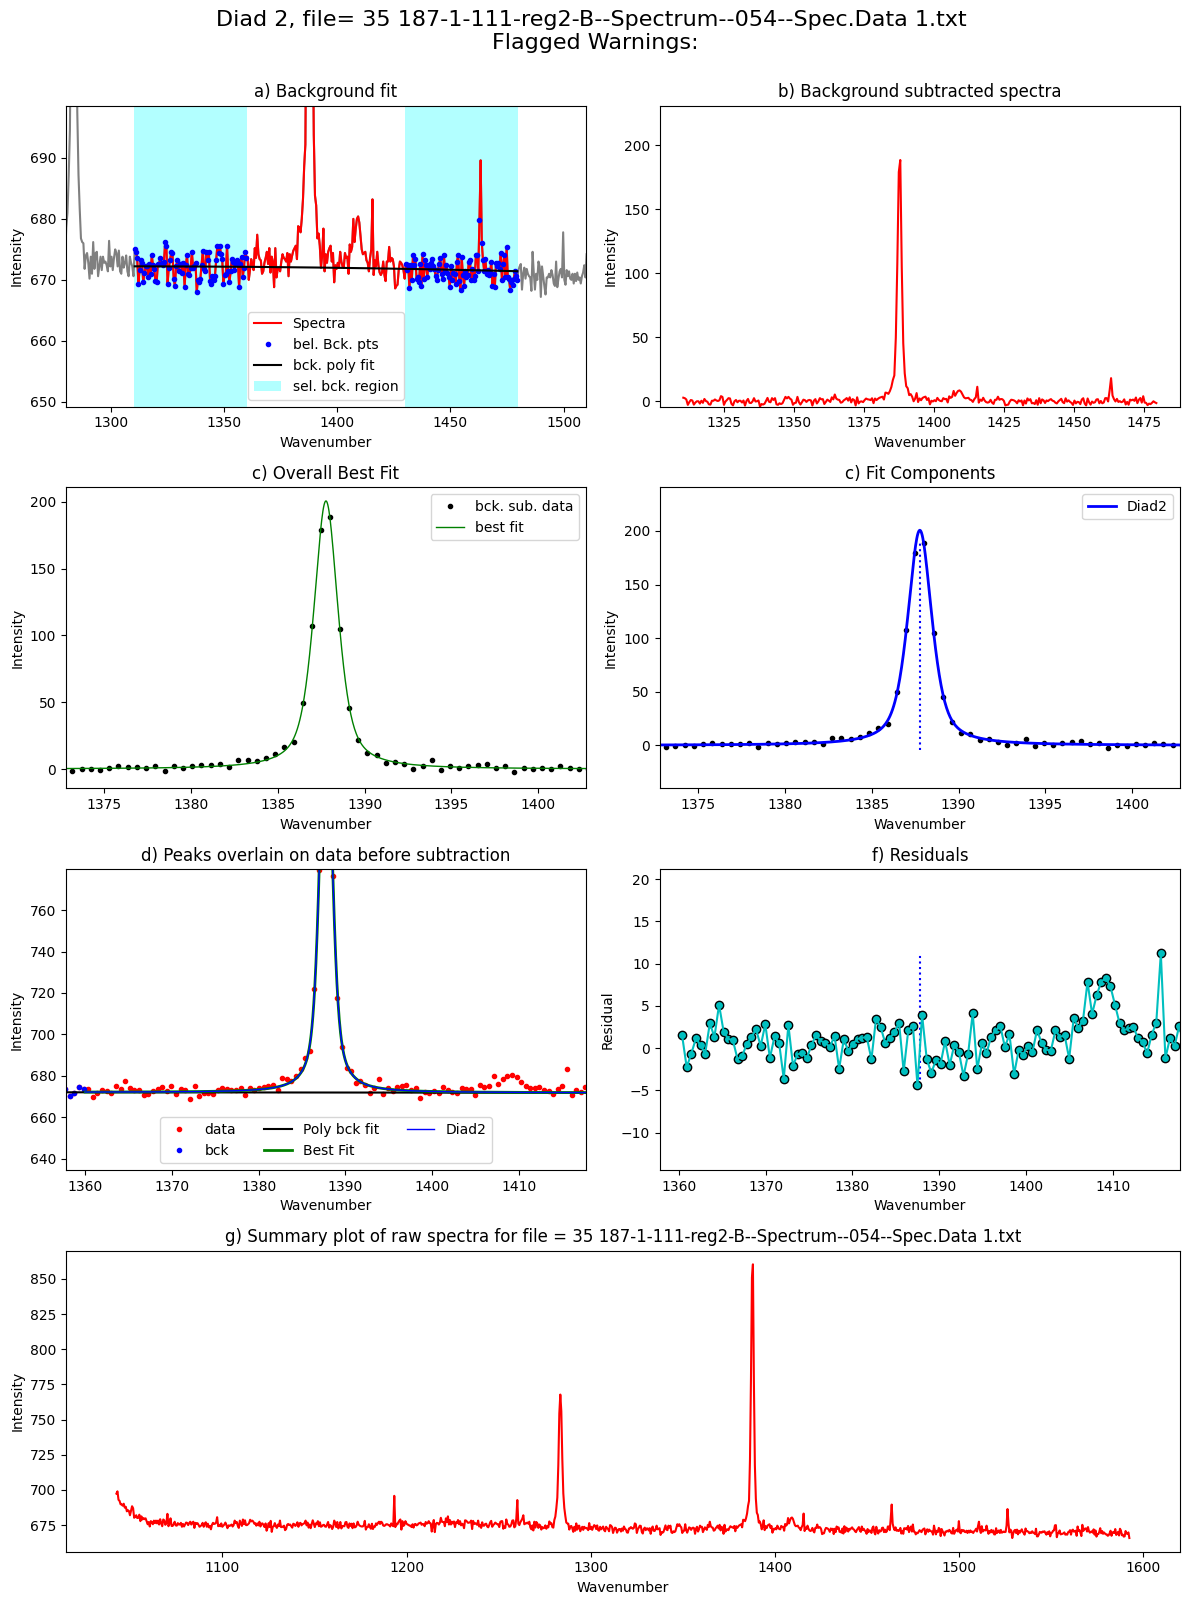

In [ ]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=spectra_filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=spectra_filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [ ]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)
if batch=='Std':
    combo.to_excel('Std_Diads.xlsx', index=False)

In [ ]:
combo

filename   Splitting   Split_σ  \
0  187-1-110-A--Spectrum--009--Spec.Data 1_CRR_Di...  104.235139  0.014270   
1  187-1-110-A--Spectrum--010--Spec.Data 1_CRR_Di...  104.221638  0.016030   
2  187-1-110-A--Spectrum--011--Spec.Data 1_CRR_Di...  104.147419  0.016167   
3  187-1-111-reg1-C--Spectrum--043--Spec.Data 1_C...  103.495735  0.008924   
4       187-1-111-reg1-C--Spectrum--044--Spec.Data 1  103.492478  0.008913   
5       187-1-111-reg2-B--Spectrum--052--Spec.Data 1  104.290789  0.018233   
6       187-1-111-reg2-B--Spectrum--053--Spec.Data 1  104.302180  0.025123   
7       187-1-111-reg2-B--Spectrum--054--Spec.Data 1  104.283010  0.022694   

   Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0          1283.717910        0.012830             151.526101   
1          1283.733077        0.014621             136.028864   
2          1283.806667        0.014763             125.334859   
3          1285.331615        0.007903             225.424996   
4          1285.325821        0.007796             225.852985   
5          1283.486908        0.016723             117.954295   
6          1283.477027        0.023606              89.319627   
7          1283.486278        0.021012              96.380736   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  ...  \
0       1283.717910        450.978847           1.067749        1.876613  ...   
1       1283.733077        416.182645           1.134037        1.783855  ...   
2       1283.806667        372.675136           1.076490        1.903475  ...   
3       1285.331615        427.243376           0.696466        2.185345  ...   
4       1285.325821        434.454807           0.717640        2.209629  ...   
5       1283.486908        321.659610           1.041125        1.791579  ...   
6       1283.477027        251.987642           1.123757        1.932772  ...   
7       1283.486278        261.478549           1.074058        2.027871  ...   

   Diad1_Asym50  Diad1_Asym70 Diad1_Yuan2017_sym_factor  Diad1_Remigi2021_BSF  \
0      1.033654      1.014574                  0.071868              0.014093   
1      1.041348      1.008457                  0.093780              0.016673   
2      1.276408      1.209536                  0.595102              0.017178   
3      1.033493      1.008562                  0.046653              0.006179   
4      1.025761      1.092014                  0.036974              0.006355   
5      1.018033      1.079075                  0.037549              0.017653   
6      1.266667      1.290842                  0.599337              0.025163   
7      1.033708      1.051559                  0.072408              0.022288   

   Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0      1.087983      1.085627                   0.142970   
1      1.100000      1.117005                   0.161306   
2      1.079914      1.069909                   0.128669   
3      1.077143      1.087912                   0.084089   
4      1.036011      1.051173                   0.040809   
5      1.108932      1.054545                   0.174985   
6      1.087912      1.117460                   0.137438   
7      1.195175      1.170015                   0.324278   

   Diad2_Remigi2021_BSF   Diad1_PDF_Model   Diad2_PDF_Model  
0              0.005170  PseudoVoigtModel  PseudoVoigtModel  
1              0.005397  PseudoVoigtModel  PseudoVoigtModel  
2              0.005904  PseudoVoigtModel  PseudoVoigtModel  
3              0.002524  PseudoVoigtModel  PseudoVoigtModel  
4              0.002714  PseudoVoigtModel  PseudoVoigtModel  
5              0.006502  PseudoVoigtModel  PseudoVoigtModel  
6              0.007837  PseudoVoigtModel  PseudoVoigtModel  
7              0.008281  PseudoVoigtModel  PseudoVoigtModel  

[8 rows x 49 columns]

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [ ]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step3 Fit All")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3 Fitall is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()